# 1 - KNN Implementation From Scratch

# Importing the Data Set

In [1]:
import pandas as pd
import numpy as np

# Loading Data Set

df = pd.read_csv('diabetes_dataset.csv')

df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Cleaning the Data Set

In [2]:
# Check if any column has any 0 values

df.eq(0).any()

Pregnancies                  True
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

In [3]:
Columns_with_0 = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for column in Columns_with_0:
  
  df[column] = df[column].replace(0, np.NaN) # Replace 0's to NaN

  mean = int(df[column].mean(skipna=True)) # Find the mean of the column skipping the Null values

  df[column] = df[column].replace(np.NaN, mean) # Replace NaN with the mean value

In [4]:
# Check if any column has any 0 values

df.eq(0).any()

Pregnancies                  True
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

# Splitting the Data Set

In [5]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
  
Y = df.iloc[:,-1:].values
      
# Splitting dataset into train and test set
  
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 0 )

# Standardization

In [6]:
from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()

X_train = st_scaler.fit_transform(X_train)

X_test = st_scaler.transform(X_test)

# KNN

In [7]:
# K Nearest Neighbors Classification

from scipy.stats import mode
  
class KNN() : 
      
  def __init__( self, K ) :
          
    self.K = K
          
      
  def fit( self, X_train, Y_train ) : # Function to store training set
          
    self.X_train, self.Y_train = X_train, Y_train

    self.m, self.n = X_train.shape # No of Rows & Columns in Training Data Set
      

  def predict( self, X_test ) : # Function for prediction
          
    self.X_test = X_test
          
    self.m_test, self.n = X_test.shape # No of Rows & Columns in Test Data Set
          
    Y_predict = np.zeros( self.m_test )
          
    for i in range( self.m_test ) :

      neighbors = self.find_neighbors( self.X_test[i] ) # Find the K nearest neighbors from current test example
              
      # most frequent class in K neighbors
              
      Y_predict[i] = mode( neighbors )[0][0]    
              
    return Y_predict
      
            
  def find_neighbors( self, x ) : # Function to find the K nearest neighbors to current test example
          
    # Calculate all the Euclidean distances between current test example x and training set X_train
          
    euclidean_distances = np.zeros( self.m )
          
    for i in range( self.m ) :
              
      euclidean_distances[i] = self.euclidean( x, self.X_train[i] )
          
      Y_train_sorted = self.Y_train[euclidean_distances.argsort()] # Sort Y_train according to euclidean_distance_array and store it in Y_train_sorted
          
    return Y_train_sorted[:self.K]
      

  def euclidean( self, x, x_train ) : # Function to calculate euclidean distance
          
    return np.sqrt( np.sum( np.square( x - x_train ) ) )


# Training the Model

In [8]:
# Training the Model on the Train Data Set
      
model = KNN( K = 5 )
      
model.fit( X_train, Y_train )

# Predicting Test Data Set

In [9]:
# Prediction on test set
  
Y_pred = model.predict( X_test )

# Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_pred))

[[87 20]
 [17 30]]


# F1 Score

In [11]:
from sklearn.metrics import f1_score

print(f1_score(Y_test,Y_pred))

0.6185567010309279


# Accuracy Score

In [12]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test,Y_pred))

0.7597402597402597


# 2 - KNN Automized Implementation

# Importing the Dataset

In [13]:
import pandas as pd
import numpy as np

# Loading Data Set

df = pd.read_csv('diabetes_dataset.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Cleaning the Data Set

In [14]:
# Check if any column has any 0 values

df.eq(0).any()

Pregnancies                  True
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

In [15]:
# Columns with 0's in it 

# We don't mind about the Pregnancy attribute though it has 0 value in it since it's mean for non pregnant samples 

Columns_with_0 = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for column in Columns_with_0:
  
  df[column] = df[column].replace(0, np.NaN) # Replace 0's to NaN

  mean = int(df[column].mean(skipna=True)) # Find the mean of the column skipping the Null values

  df[column] = df[column].replace(np.NaN, mean) # Replace NaN with the mean value

In [16]:
# Check if any column has any 0 values

df.eq(0).any()

Pregnancies                  True
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

# Splitting the Data Set

In [17]:
# Here the Target Label is Outcome
# We split the Feature and the Target

from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
  
Y = df.iloc[:,-1:].values
      
# Splitting dataset into train and test set
  
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 0 )

# Standardization

In [18]:
from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()

X_train = st_scaler.fit_transform(X_train)

X_test = st_scaler.transform(X_test)

# KNN

# Training the Model

In [19]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier( n_neighbors = 5 )
model.fit( X_train, Y_train.ravel() )

KNeighborsClassifier()

# Predicting Test Data Set

In [20]:
# Prediction on test set
  
Y_pred = model.predict( X_test )

# Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_pred))

[[87 20]
 [17 30]]


# F1 Score

In [22]:
from sklearn.metrics import f1_score

print(f1_score(Y_test,Y_pred))

0.6185567010309279


# Accuracy Score

In [23]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test,Y_pred))

0.7597402597402597


# 3 - K Fold Cross Validation Methods

# Simple K Fold

In [24]:
from sklearn.model_selection import KFold 

accuracy1 = []

kf = KFold(n_splits=5, random_state=None)

for train_index, test_index in kf.split(X):

    #print("Train:", train_index, "\nValidation:",test_index) 

    X_train, X_test = X[train_index], X[test_index] 
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Training the Model
    model = KNeighborsClassifier( n_neighbors = 5 )
    model.fit( X_train, Y_train.ravel() )

    # Predicting Test Data Set
    Y_pred = model.predict( X_test )

    # Confusion Matrix
    print("\n\nConfusion Matrix\n\n", confusion_matrix(Y_test,Y_pred), end = "\n")

    # F1 Score
    print("\nF1 Score : ", f1_score(Y_test,Y_pred), end = "\n")

    # Accuracy Score
    accuracy1.append(accuracy_score(Y_test, Y_pred))
    print("\nAccuracy Score : ", accuracy_score(Y_test,Y_pred))



Confusion Matrix

 [[83 17]
 [24 30]]

F1 Score :  0.594059405940594

Accuracy Score :  0.7337662337662337


Confusion Matrix

 [[73 17]
 [27 37]]

F1 Score :  0.6271186440677967

Accuracy Score :  0.7142857142857143


Confusion Matrix

 [[81 16]
 [26 31]]

F1 Score :  0.5961538461538461

Accuracy Score :  0.7272727272727273


Confusion Matrix

 [[90 24]
 [14 25]]

F1 Score :  0.5681818181818182

Accuracy Score :  0.7516339869281046


Confusion Matrix

 [[78 21]
 [19 35]]

F1 Score :  0.6363636363636364

Accuracy Score :  0.738562091503268


# Startified K Fold

In [25]:
from sklearn.model_selection import StratifiedKFold

accuracy2 = []

skf = StratifiedKFold(n_splits=5, random_state=None)

for train_index, test_index in kf.split(X):

    #print("Train:", train_index, "\nValidation:",test_index) 

    X_train, X_test = X[train_index], X[test_index] 
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Training the Model
    model = KNeighborsClassifier( n_neighbors = 5 )
    model.fit( X_train, Y_train.ravel() )

    # Predicting Test Data Set
    Y_pred = model.predict( X_test )

    # Confusion Matrix
    print("\n\nConfusion Matrix\n\n", confusion_matrix(Y_test,Y_pred), end = "\n")

    # F1 Score
    print("\nF1 Score : ", f1_score(Y_test,Y_pred), end = "\n")

    # Accuracy Score
    accuracy2.append(accuracy_score(Y_test, Y_pred))
    print("\nAccuracy Score : ", accuracy_score(Y_test,Y_pred))



Confusion Matrix

 [[83 17]
 [24 30]]

F1 Score :  0.594059405940594

Accuracy Score :  0.7337662337662337


Confusion Matrix

 [[73 17]
 [27 37]]

F1 Score :  0.6271186440677967

Accuracy Score :  0.7142857142857143


Confusion Matrix

 [[81 16]
 [26 31]]

F1 Score :  0.5961538461538461

Accuracy Score :  0.7272727272727273


Confusion Matrix

 [[90 24]
 [14 25]]

F1 Score :  0.5681818181818182

Accuracy Score :  0.7516339869281046


Confusion Matrix

 [[78 21]
 [19 35]]

F1 Score :  0.6363636363636364

Accuracy Score :  0.738562091503268


# Repeated K Fold

In [26]:
from sklearn.model_selection import RepeatedKFold

accuracy3 = []

kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

for train_index, test_index in kf.split(X):

    #print("Train:", train_index, "\nValidation:",test_index) 

    X_train, X_test = X[train_index], X[test_index] 
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Training the Model
    model = KNeighborsClassifier( n_neighbors = 5 )
    model.fit( X_train, Y_train.ravel() )

    # Predicting Test Data Set
    Y_pred = model.predict( X_test )

    # Confusion Matrix
    print("\n\nConfusion Matrix\n\n", confusion_matrix(Y_test,Y_pred), end = "\n")

    # F1 Score
    print("\nF1 Score : ", f1_score(Y_test,Y_pred), end = "\n")

    # Accuracy Score
    accuracy3.append(accuracy_score(Y_test, Y_pred))
    print("\nAccuracy Score : ", accuracy_score(Y_test,Y_pred))



Confusion Matrix

 [[83 20]
 [18 33]]

F1 Score :  0.6346153846153846

Accuracy Score :  0.7532467532467533


Confusion Matrix

 [[78 18]
 [26 32]]

F1 Score :  0.5925925925925927

Accuracy Score :  0.7142857142857143


Confusion Matrix

 [[82 19]
 [19 34]]

F1 Score :  0.6415094339622641

Accuracy Score :  0.7532467532467533


Confusion Matrix

 [[85 13]
 [23 32]]

F1 Score :  0.64

Accuracy Score :  0.7647058823529411


Confusion Matrix

 [[79 23]
 [22 29]]

F1 Score :  0.5631067961165048

Accuracy Score :  0.7058823529411765


Confusion Matrix

 [[85 13]
 [19 37]]

F1 Score :  0.6981132075471698

Accuracy Score :  0.7922077922077922


Confusion Matrix

 [[79 23]
 [22 30]]

F1 Score :  0.5714285714285713

Accuracy Score :  0.7077922077922078


Confusion Matrix

 [[82 18]
 [18 36]]

F1 Score :  0.6666666666666666

Accuracy Score :  0.7662337662337663


Confusion Matrix

 [[87 16]
 [19 31]]

F1 Score :  0.6391752577319586

Accuracy Score :  0.7712418300653595


Confusion Matrix

 [[7

# Accuracy Check

In [27]:
print("Mean Accuracy of K Fold : ", np.mean(accuracy1))

print("Mean Accuracy of Stratified K Fold : ", np.mean(accuracy2))

print("Mean Accuracy of Repeated K Fold : ", np.mean(accuracy3))

Mean Accuracy of K Fold :  0.7331041507512095
Mean Accuracy of Stratified K Fold :  0.7331041507512095
Mean Accuracy of Repeated K Fold :  0.7390331890331892


* Comparing the Mean Accuracy of all 3 K Fold Cross Validation Methods, the accuracy of **Repeated K Fold** is High.

# ROC AUC Score Method 1

```
AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. 

ROC is a probability curve and AUC represents degree or measure of separability. 

It tells how much model is capable of distinguishing between classes. 

Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 

By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.
```

In [28]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import roc_curve, auc

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, stratify = Y)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Model
model = KNeighborsClassifier( n_neighbors = 5 )
model.fit(X_train, Y_train.ravel())

# The function predict_proba() returns a numpy array of two columns. 
# The first column is the probability that target=0 and the second column is the probability that target = 1

Y_pred = model.predict_proba(X_test)

# Select the probability estimates of the positive class
fpr, tpr, threshold = roc_curve(Y_test, Y_pred[:, 1])

# Predicting Test Data Set
#Y_pred = model.predict(X_test)

#print("Accuracy : ", accuracy_score(Y_test, Y_pred))
# print("False Postive Rate (FPR) :", fpr)
# print("True Positive Rate (TPR) :", tpr)
# print("Threshold :",threshold)

print("ROC AUC Score :", auc(fpr, tpr))

ROC AUC Score : 0.8427777777777777


# ROC AUC Score Method 2

In [29]:
from sklearn.metrics import roc_auc_score

# The function predict_proba() returns a numpy array of two columns. 
# The first column is the probability that target=0 and the second column is the probability that target = 1

Y_pred = model.predict_proba(X_test)

roc_auc_score = roc_auc_score(Y_test, Y_pred[:,1])

print("ROC AUC Score using Sklearn :", roc_auc_score)

ROC AUC Score using Sklearn : 0.8427777777777777


# Plot ROC Curve

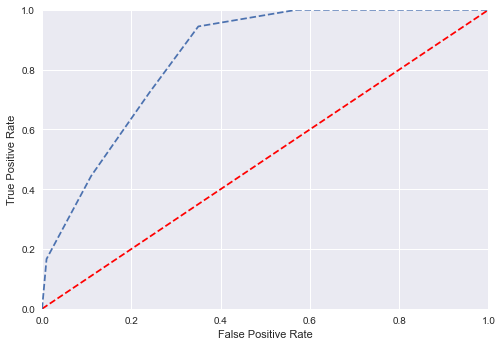

In [30]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.plot([0, 1], [0, 1],'r--') # Set baseline model as diagonal

plt.xlim([0, 1]) # Set x axis limits
plt.ylim([0, 1]) # Set y axis limits

plt.xlabel('False Positive Rate') # X Label
plt.ylabel('True Positive Rate') # Y Label

plt.plot(fpr, tpr, linestyle='--', label = 'AUC = %0.2f' %roc_auc_score)
plt.show()

# ROC Curve for Various N

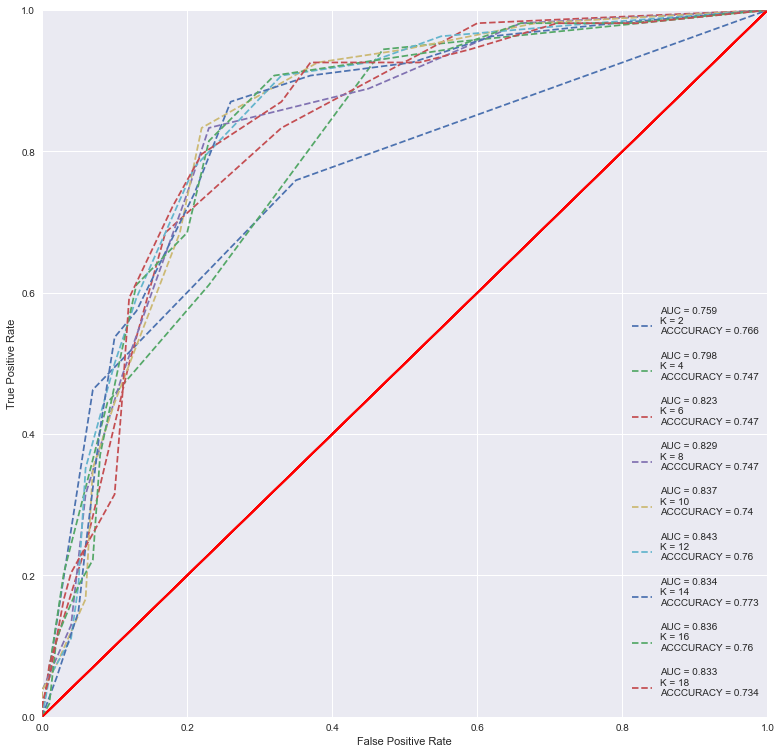

In [31]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, stratify = Y)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.figure(figsize=(13,13))

for i in range(2,20,2):

  # Training the Model
  model = KNeighborsClassifier( n_neighbors = i )
  model.fit(X_train, Y_train.ravel())

  # The function predict_proba() returns a numpy array of two columns. 
  # The first column is the probability that target=0 and the second column is the probability that target = 1

  Y_pred = model.predict_proba(X_test)

  # Select the probability estimates of the positive class
  fpr, tpr, threshold = roc_curve(Y_test, Y_pred[:, 1])

  roc_auc = roc_auc_score(Y_test, Y_pred[:, 1])

  # Predicting Test Data Set
  Y_pred = model.predict(X_test)
    
  plt.plot([0, 1], [0, 1],'r-')
  plt.xlim([0, 1]) 
  plt.ylim([0, 1])

  plt.ylabel('True Positive Rate') 
  plt.xlabel('False Positive Rate') 

  plt.plot(fpr, tpr, linestyle='--', label = 'AUC = {}\nK = {}\nACCCURACY = {}\n'.format(roc_auc.round(3),i,accuracy_score(Y_test, Y_pred).round(3)))
  plt.legend()

plt.show()

# ROC Curve for Simple K Fold

<Figure size 576x396 with 0 Axes>

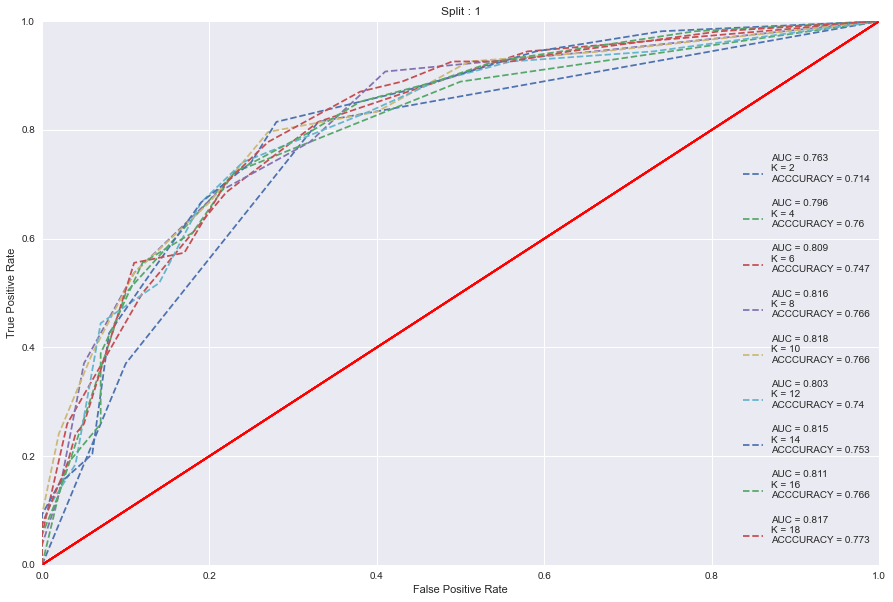

<Figure size 576x396 with 0 Axes>

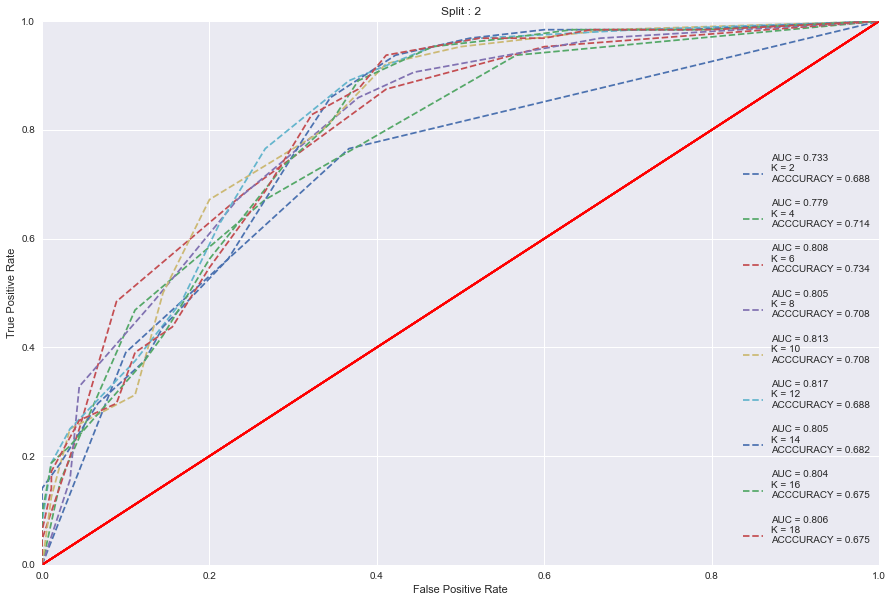

<Figure size 576x396 with 0 Axes>

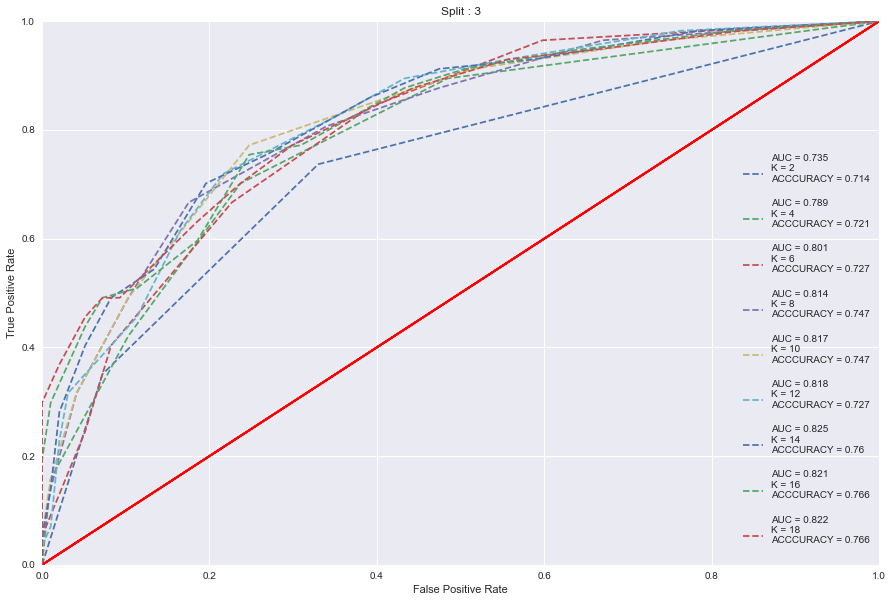

<Figure size 576x396 with 0 Axes>

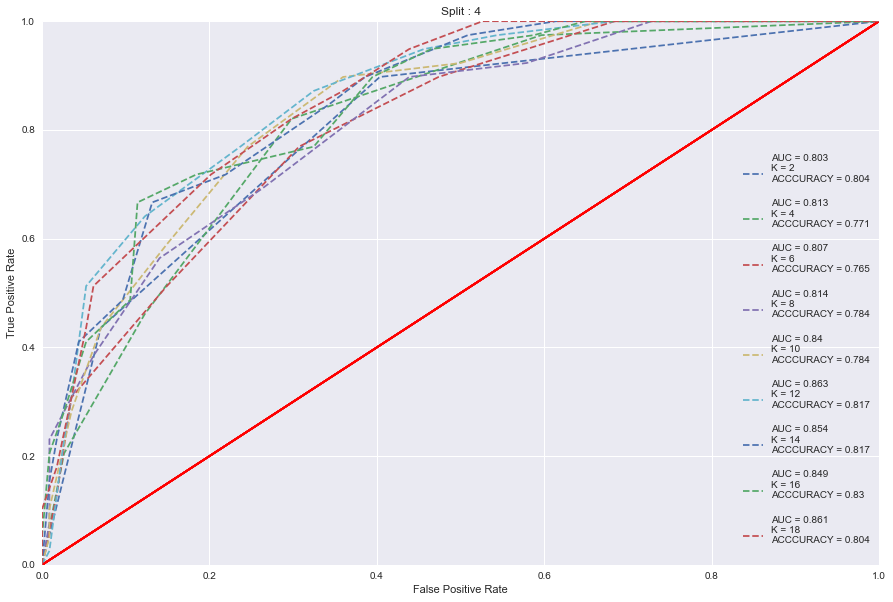

<Figure size 576x396 with 0 Axes>

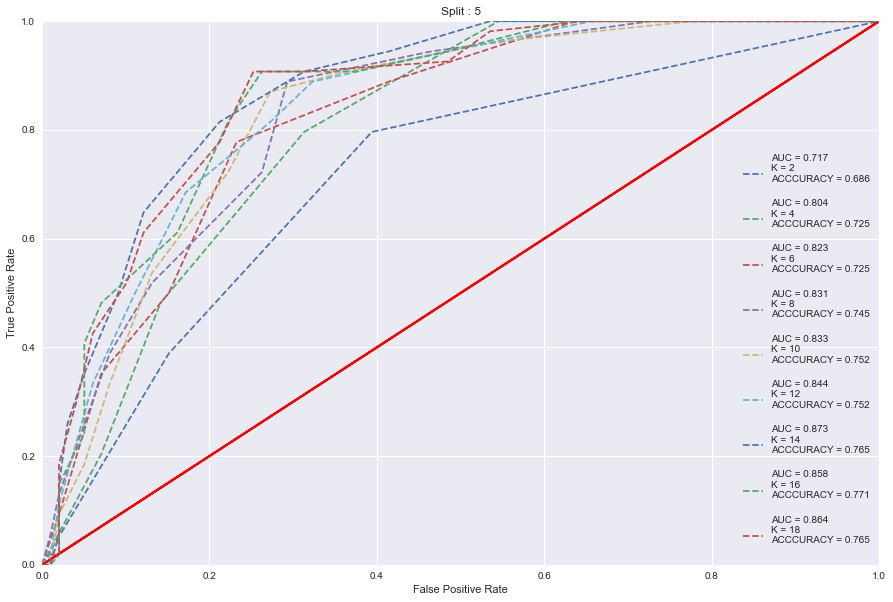

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Splitting dataset into train and test set
  
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2,  stratify = None, shuffle=False)

# Standardization Of Data Set

st_scaler = StandardScaler()
X_train = st_scaler.fit_transform(X_train)
X_test = st_scaler.transform(X_test)

kf = KFold(n_splits=5, random_state=None)

j = 1

for train_index, test_index in kf.split(X):

    #print("Train:", train_index, "\nValidation:",test_index) 

    X_train, X_test = X[train_index], X[test_index] 
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Training the Model
    model = KNeighborsClassifier( n_neighbors = 5 )
    model.fit( X_train, Y_train.ravel() )

    plt.figure()
    plt.figure(figsize=(15,10))

    for i in range(2,20,2):

      # Training the Model
      model = KNeighborsClassifier( n_neighbors = i )
      model.fit(X_train, Y_train.ravel())

      # The function predict_proba() returns a numpy array of two columns. 
      # The first column is the probability that target=0 and the second column is the probability that target = 1

      Y_pred = model.predict_proba(X_test)

      # Select the probability estimates of the positive class
      fpr, tpr, threshold = roc_curve(Y_test, Y_pred[:, 1])

      roc_auc = roc_auc_score(Y_test, Y_pred[:, 1])

      # Predicting Test Data Set
      Y_pred = model.predict(X_test)
    
      plt.title('Split : {}'.format(j))
      plt.plot([0, 1], [0, 1],'r-')
      plt.xlim([0, 1]) 
      plt.ylim([0, 1])

      plt.ylabel('True Positive Rate') 
      plt.xlabel('False Positive Rate') 

      plt.plot(fpr, tpr, linestyle='--', label = 'AUC = {}\nK = {}\nACCCURACY = {}\n'.format(roc_auc.round(3),i,accuracy_score(Y_test, Y_pred).round(3)))
      plt.legend()

    plt.show()
    j += 1

# ROC Curve for Stratified K Fold

<Figure size 576x396 with 0 Axes>

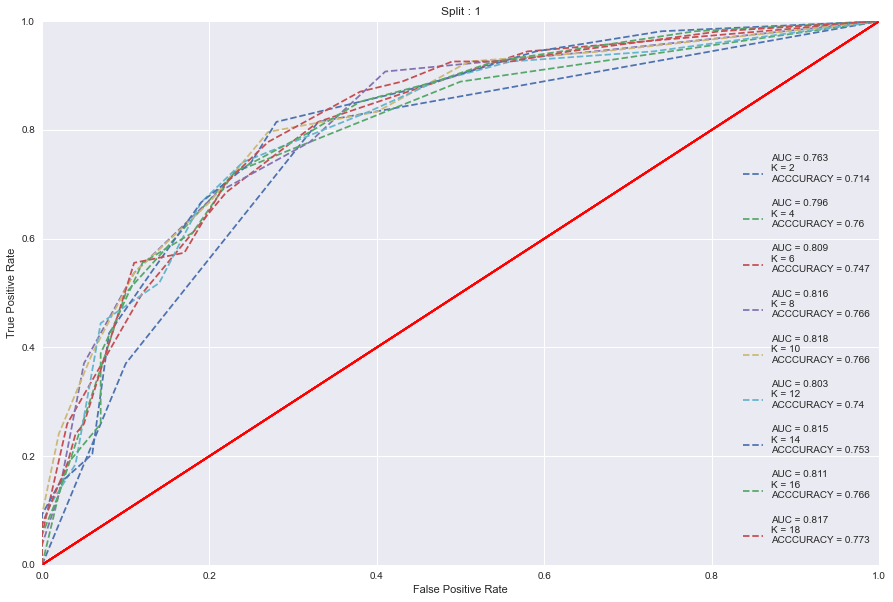

<Figure size 576x396 with 0 Axes>

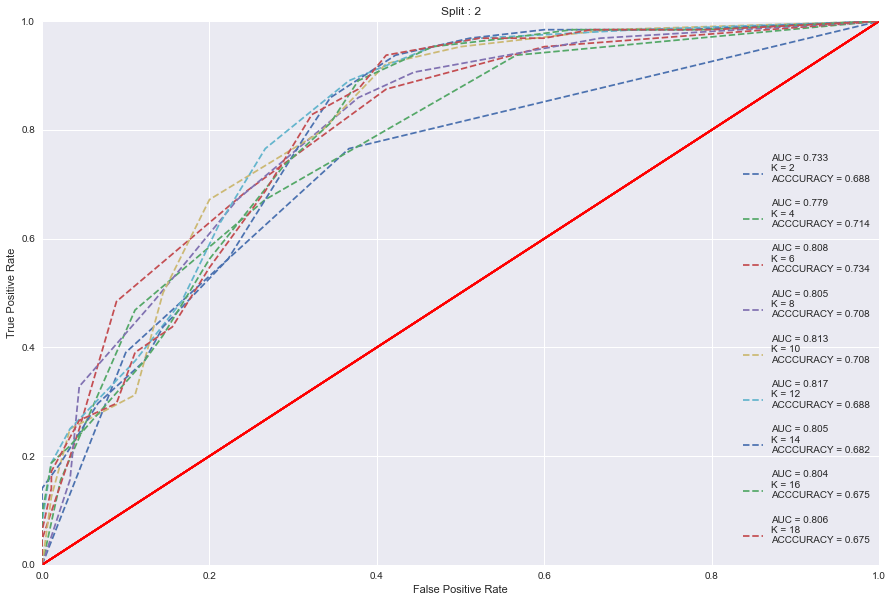

<Figure size 576x396 with 0 Axes>

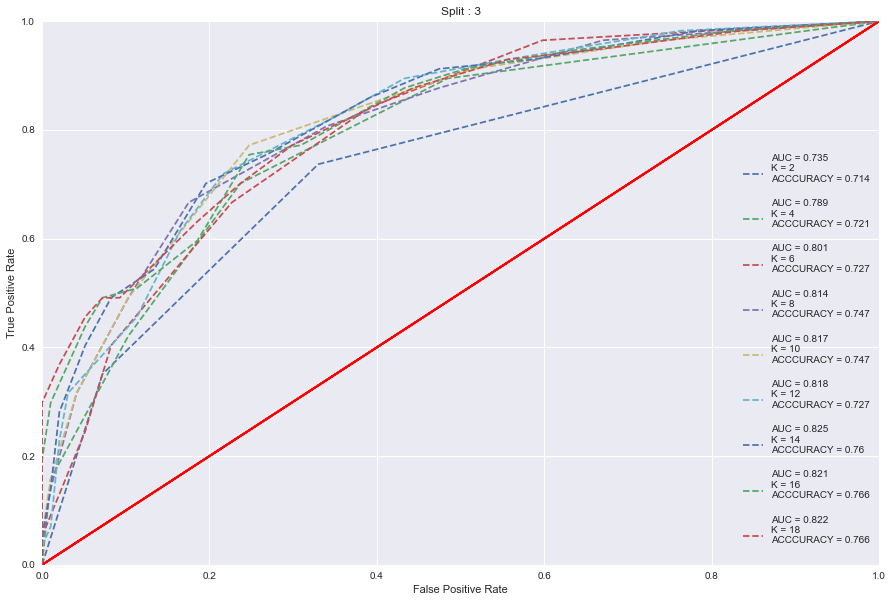

<Figure size 576x396 with 0 Axes>

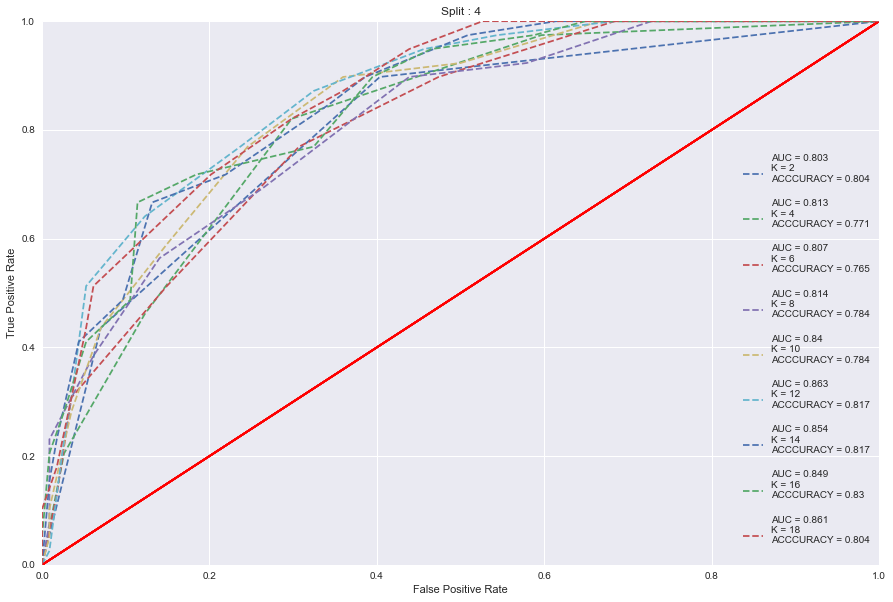

<Figure size 576x396 with 0 Axes>

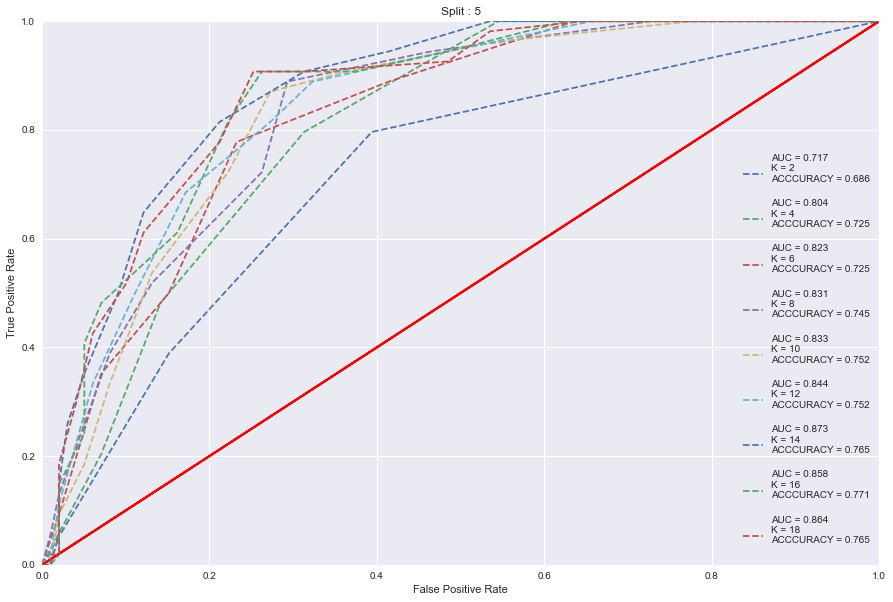

In [33]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

skf = StratifiedKFold(n_splits=5, random_state=None)

j = 1

for train_index, test_index in kf.split(X):

    #print("Train:", train_index, "\nValidation:",test_index) 

    X_train, X_test = X[train_index], X[test_index] 
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Training the Model
    model = KNeighborsClassifier( n_neighbors = 5 )
    model.fit( X_train, Y_train.ravel() )

    plt.figure()
    plt.figure(figsize=(15,10))

    for i in range(2,20,2):

      # Training the Model
      model = KNeighborsClassifier( n_neighbors = i )
      model.fit(X_train, Y_train.ravel())

      # The function predict_proba() returns a numpy array of two columns. 
      # The first column is the probability that target=0 and the second column is the probability that target = 1

      Y_pred = model.predict_proba(X_test)

      # Select the probability estimates of the positive class
      fpr, tpr, threshold = roc_curve(Y_test, Y_pred[:, 1])

      roc_auc = roc_auc_score(Y_test, Y_pred[:, 1])

      # Predicting Test Data Set
      Y_pred = model.predict(X_test)
    
      plt.title('Split : {}'.format(j))
      plt.plot([0, 1], [0, 1],'r-')
      plt.xlim([0, 1]) 
      plt.ylim([0, 1])

      plt.ylabel('True Positive Rate') 
      plt.xlabel('False Positive Rate') 

      plt.plot(fpr, tpr, linestyle='--', label = 'AUC = {}\nK = {}\nACCCURACY = {}\n'.format(roc_auc.round(3),i,accuracy_score(Y_test, Y_pred).round(3)))
      plt.legend()

    plt.show()
    j += 1

# ROC Curve for Repeated K Fold

<Figure size 576x396 with 0 Axes>

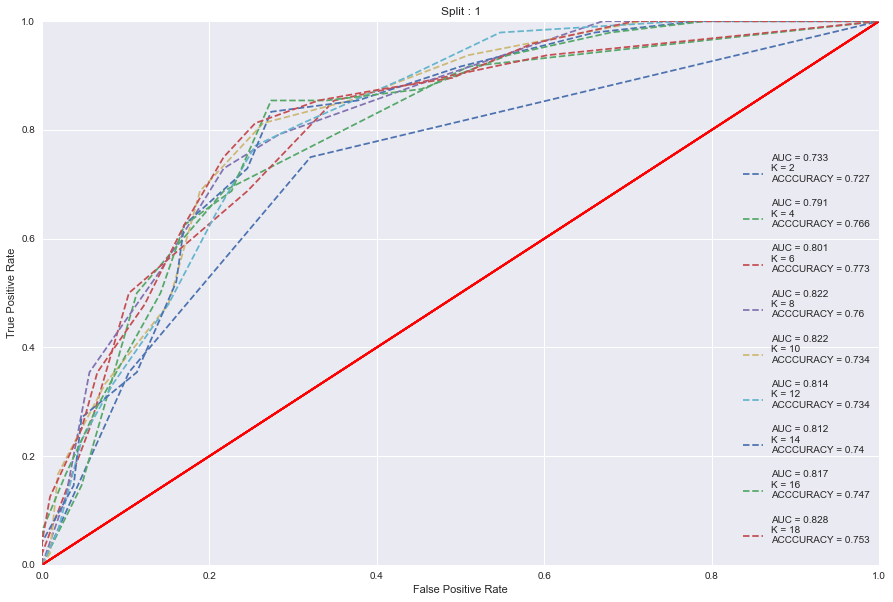

<Figure size 576x396 with 0 Axes>

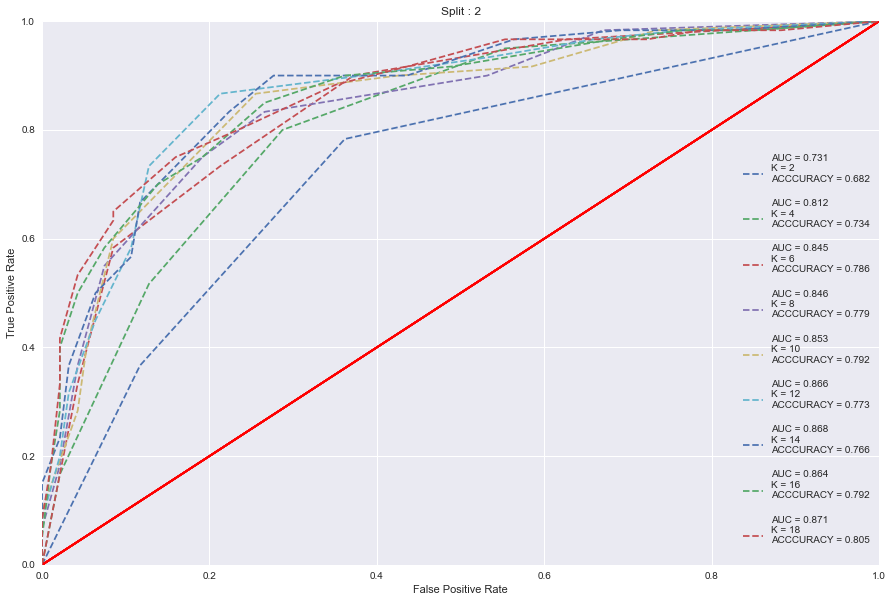

<Figure size 576x396 with 0 Axes>

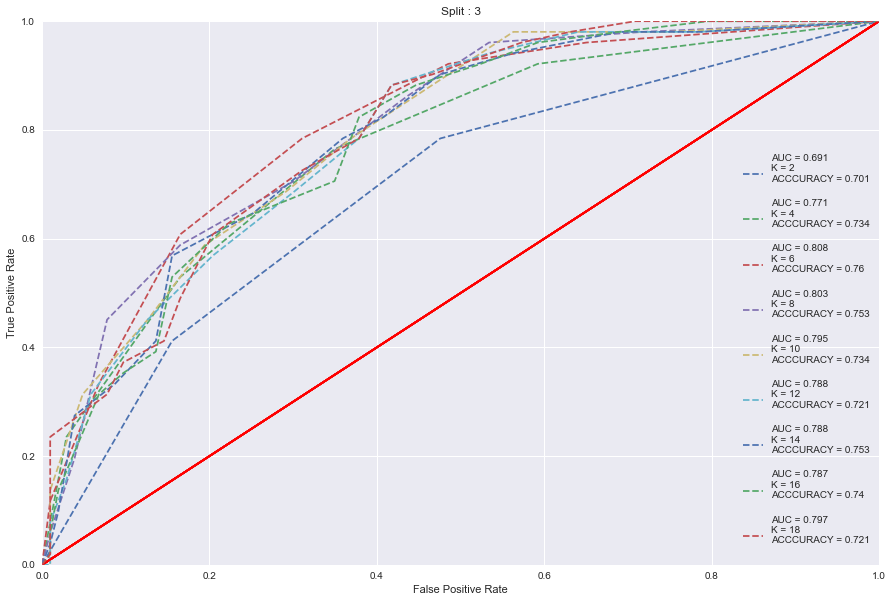

<Figure size 576x396 with 0 Axes>

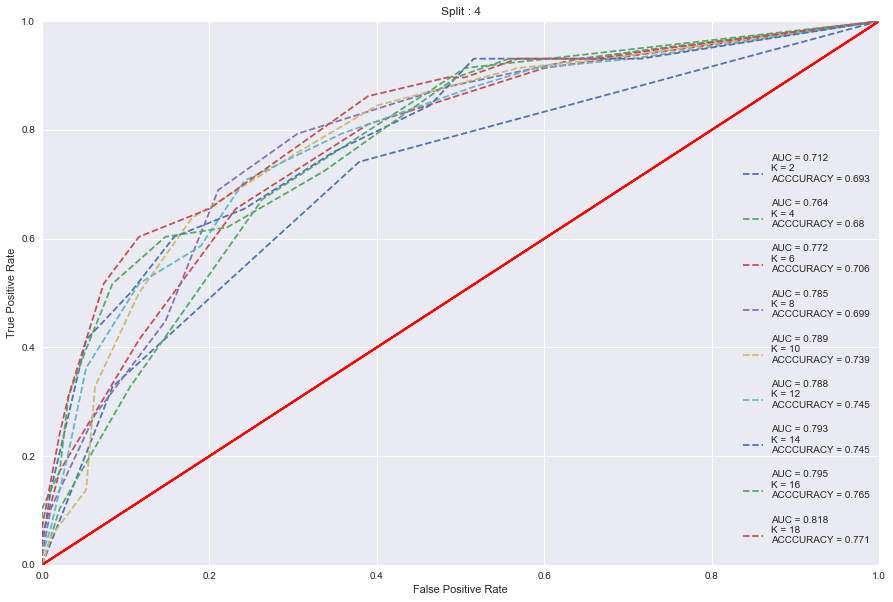

<Figure size 576x396 with 0 Axes>

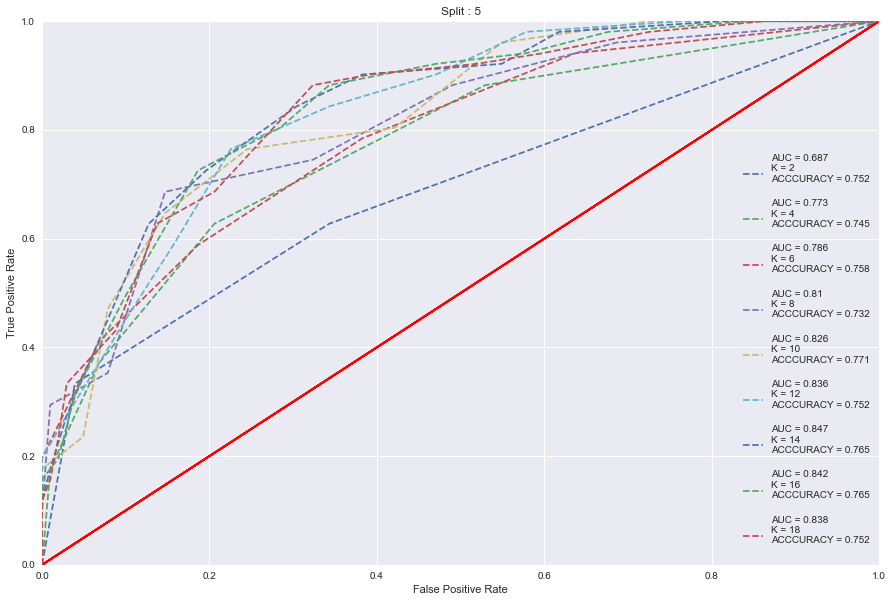

<Figure size 576x396 with 0 Axes>

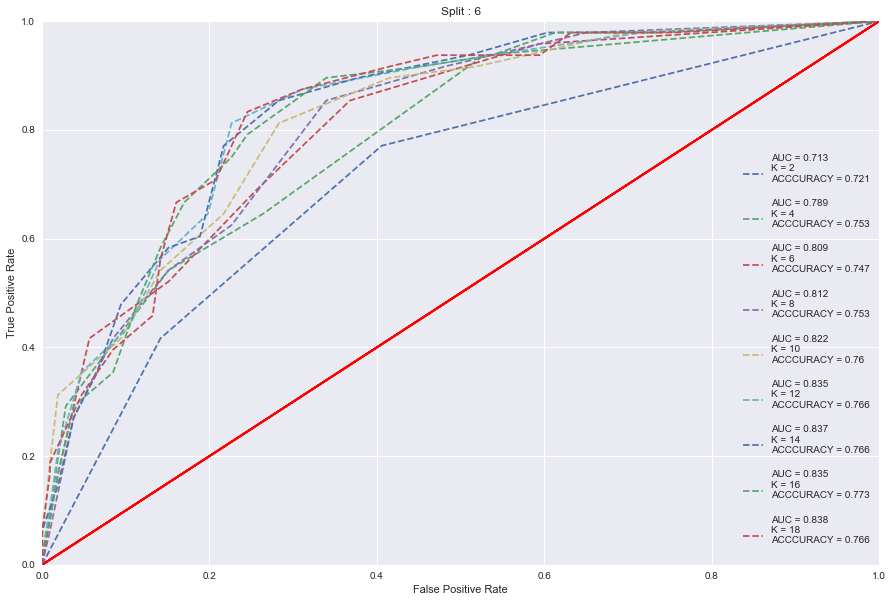

<Figure size 576x396 with 0 Axes>

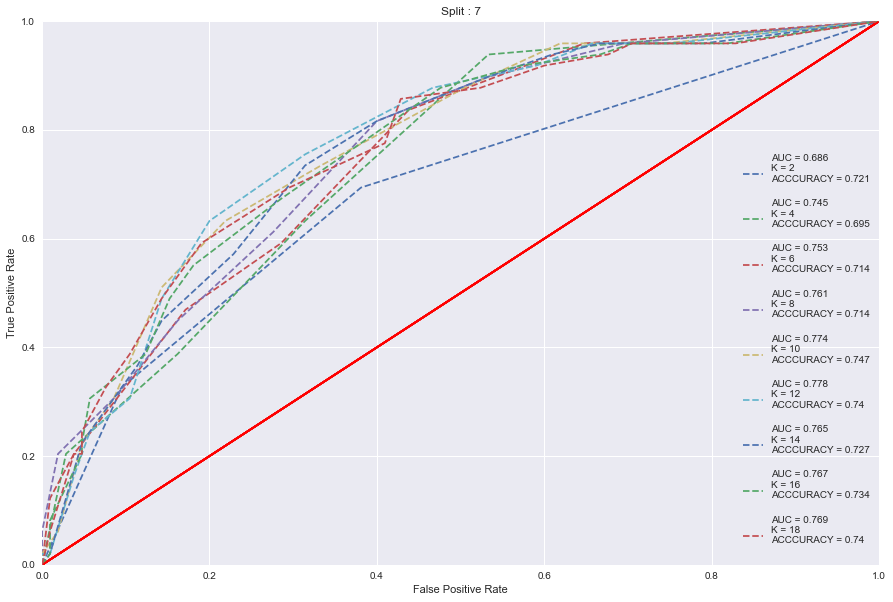

<Figure size 576x396 with 0 Axes>

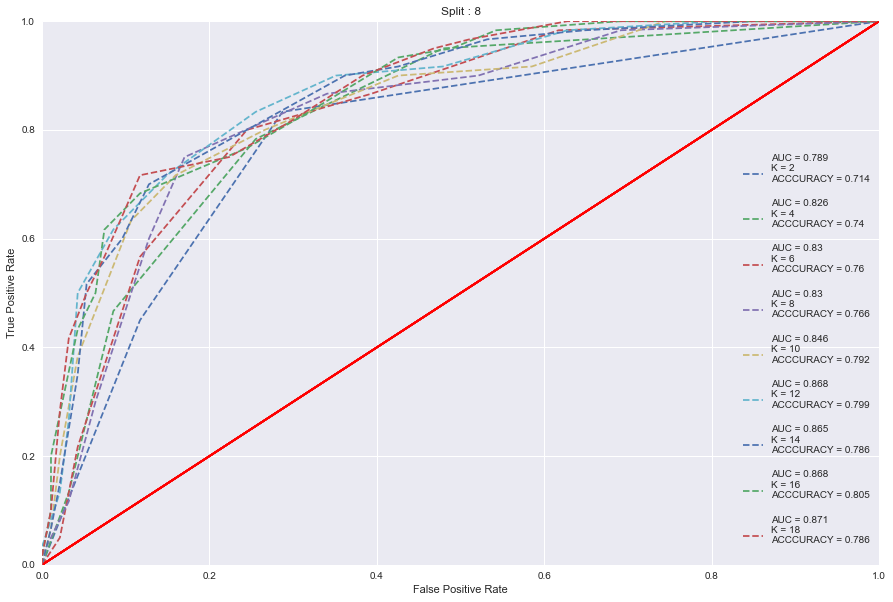

<Figure size 576x396 with 0 Axes>

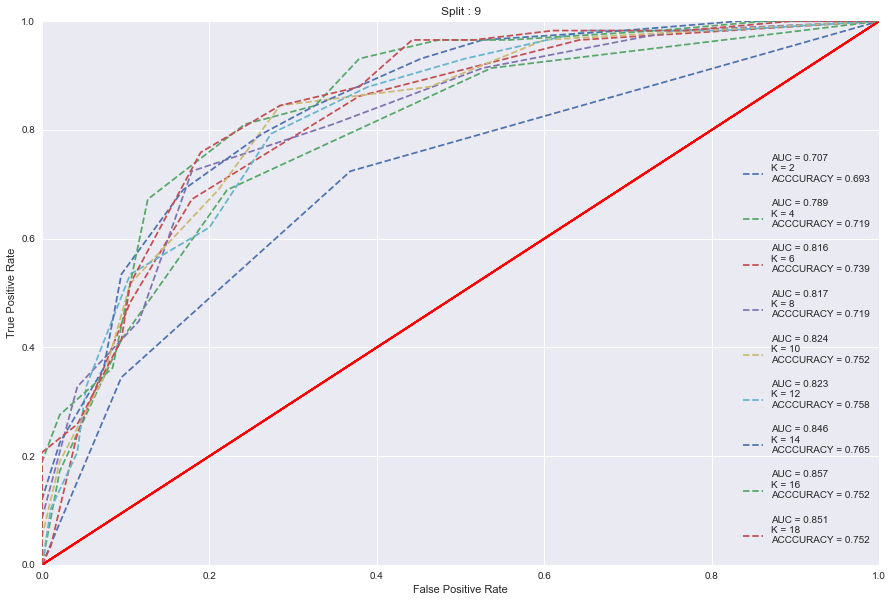

<Figure size 576x396 with 0 Axes>

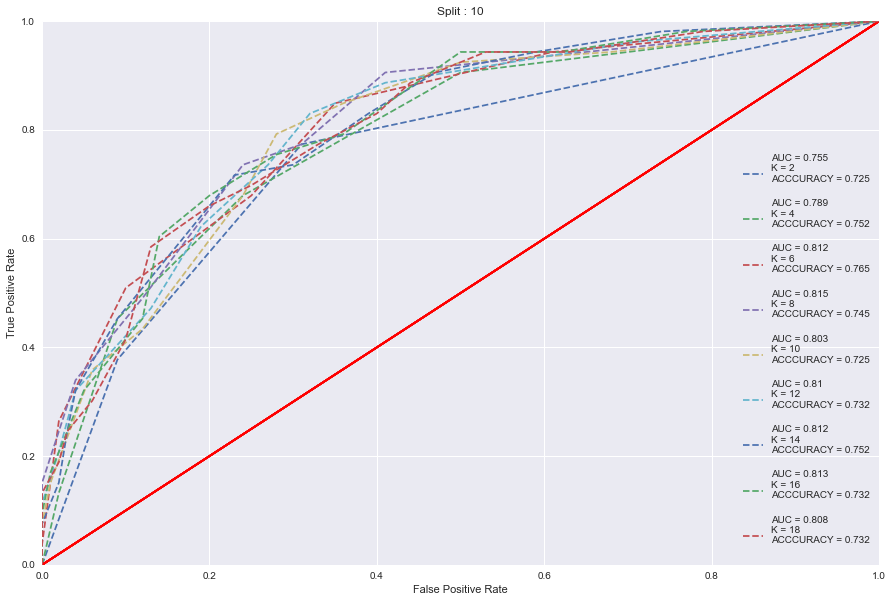

<Figure size 576x396 with 0 Axes>

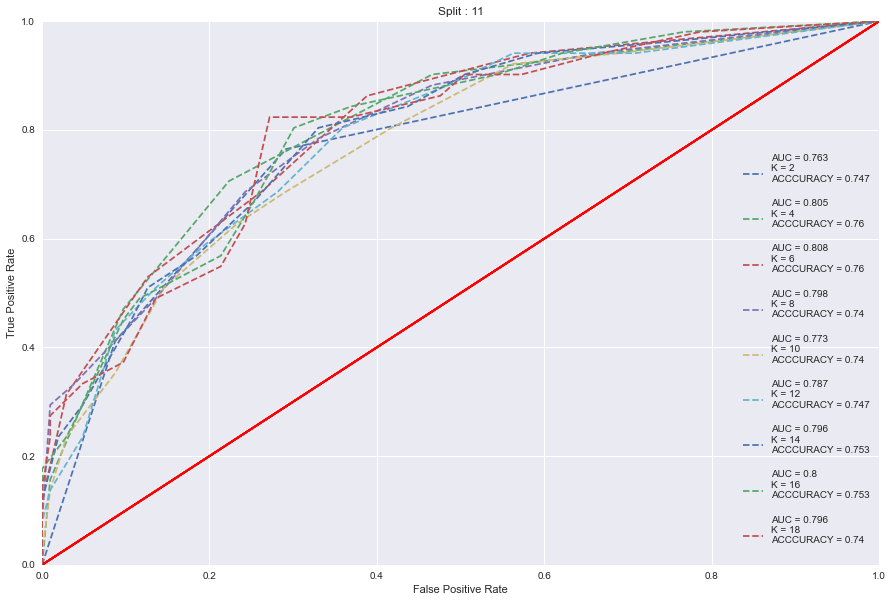

<Figure size 576x396 with 0 Axes>

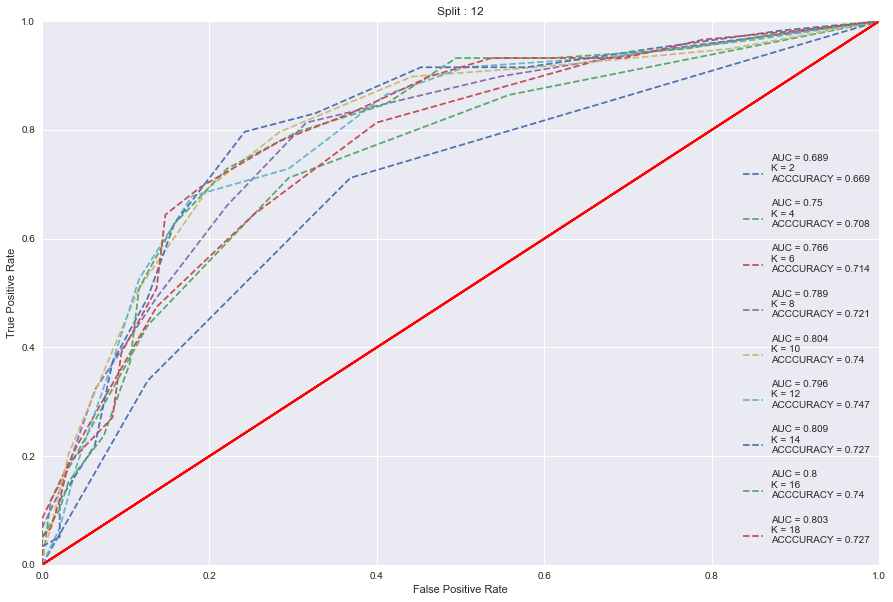

<Figure size 576x396 with 0 Axes>

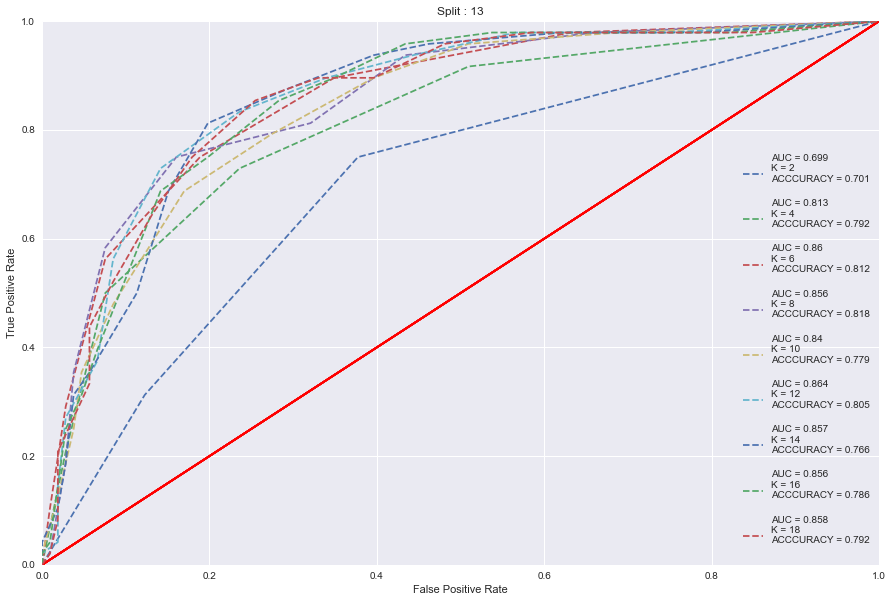

<Figure size 576x396 with 0 Axes>

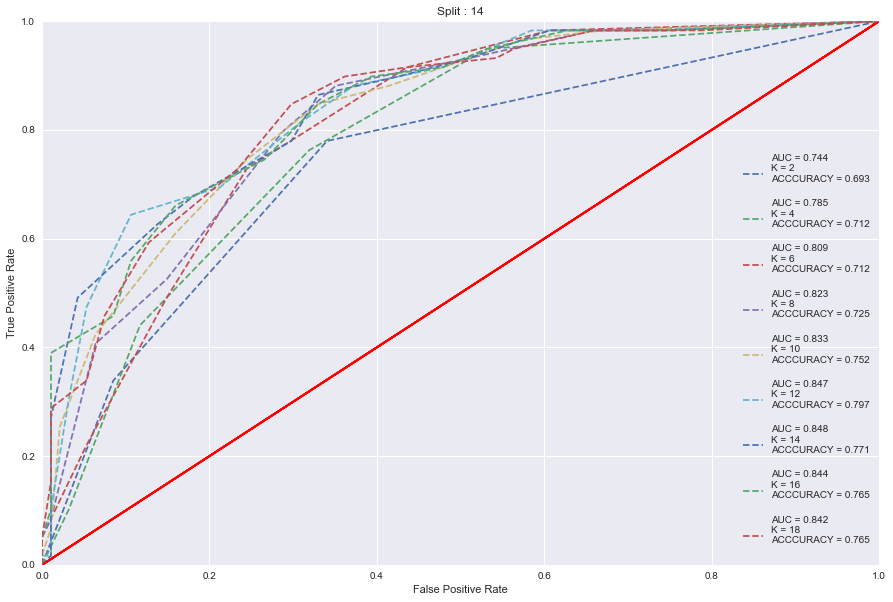

<Figure size 576x396 with 0 Axes>

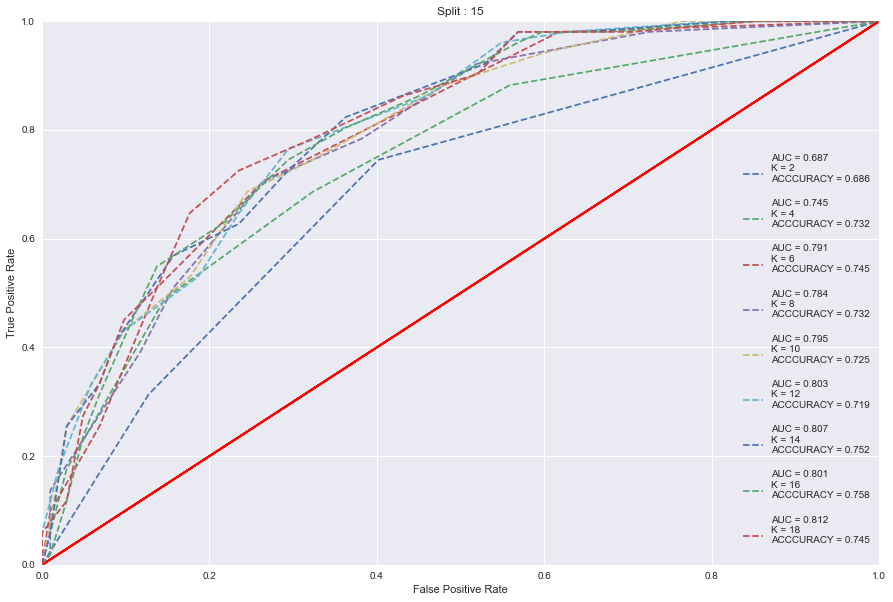

<Figure size 576x396 with 0 Axes>

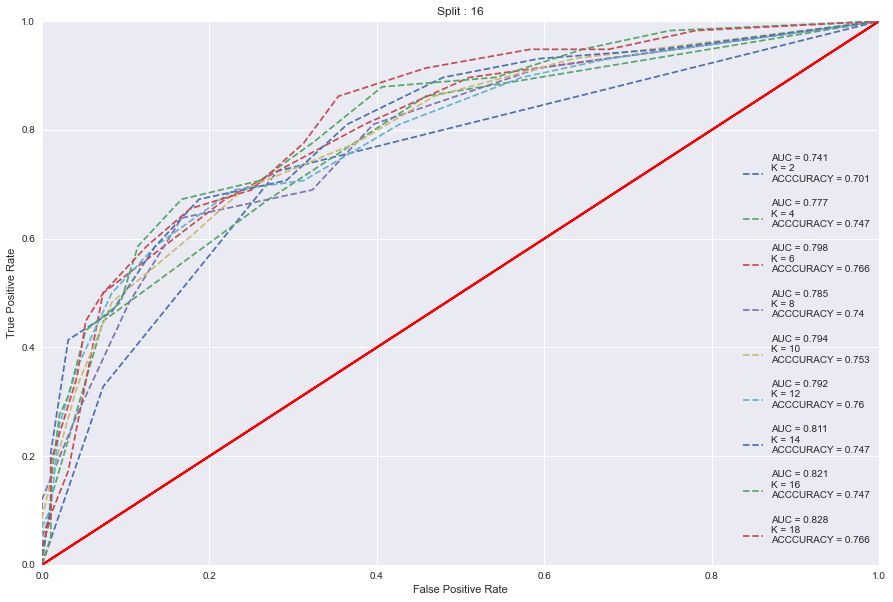

<Figure size 576x396 with 0 Axes>

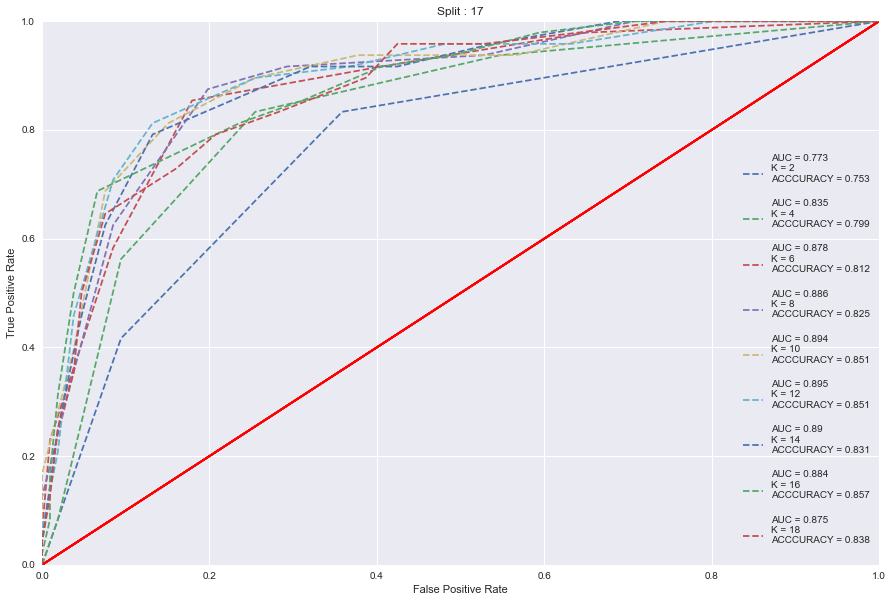

<Figure size 576x396 with 0 Axes>

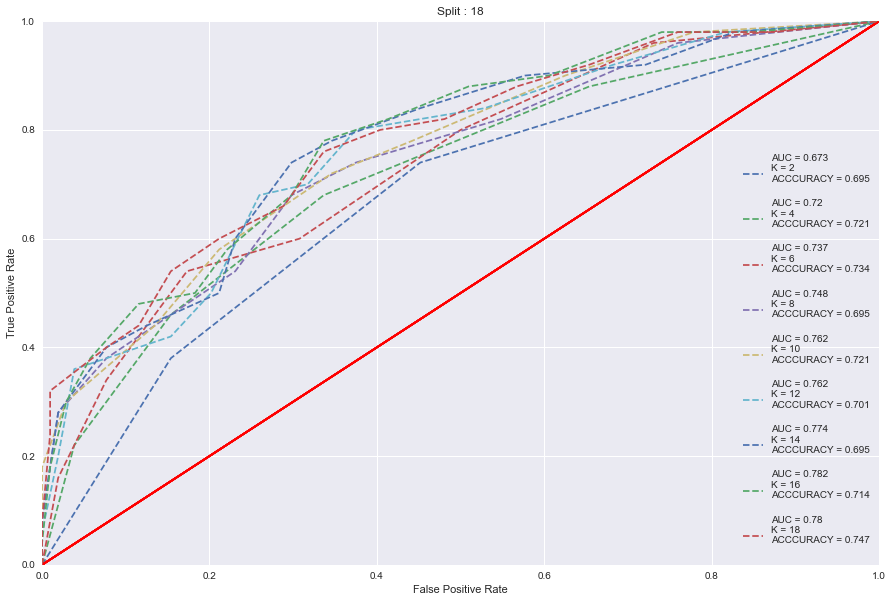

<Figure size 576x396 with 0 Axes>

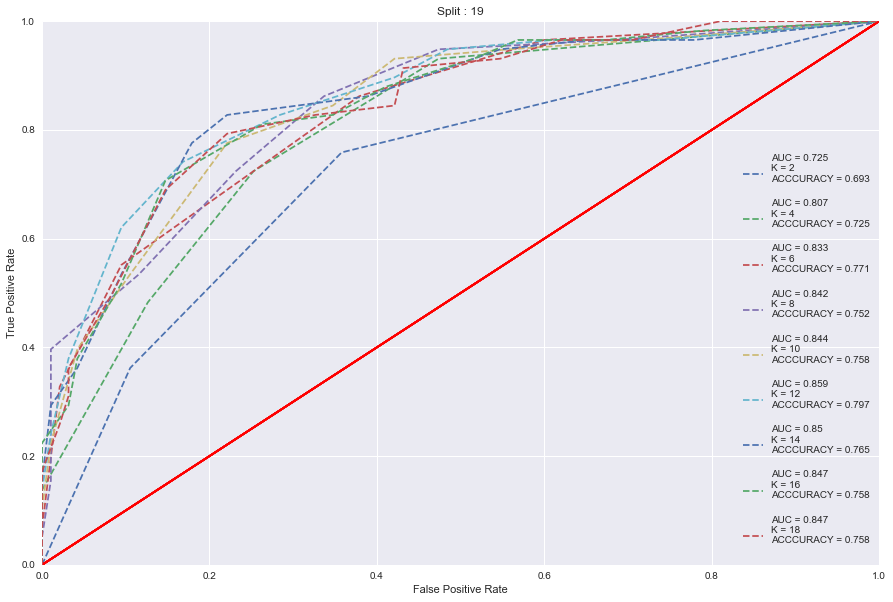

<Figure size 576x396 with 0 Axes>

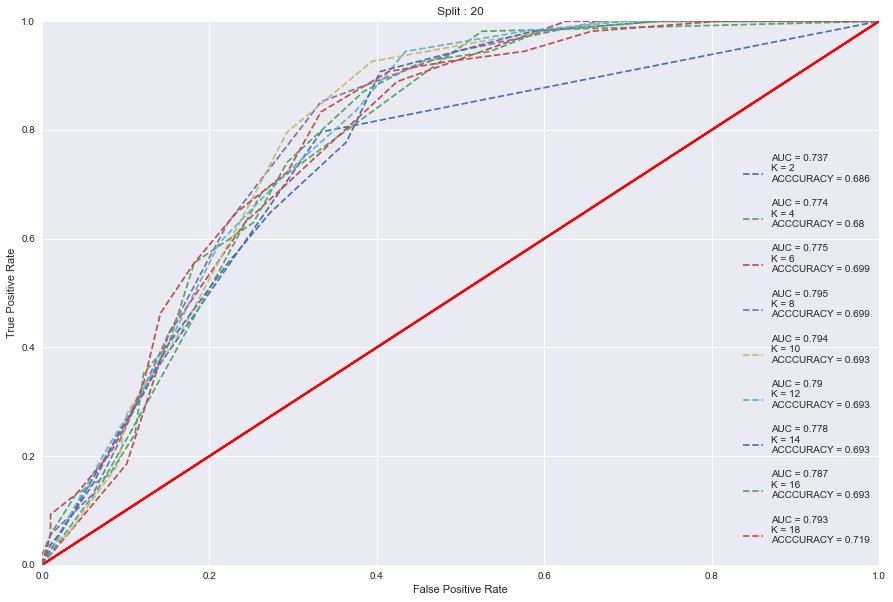

<Figure size 576x396 with 0 Axes>

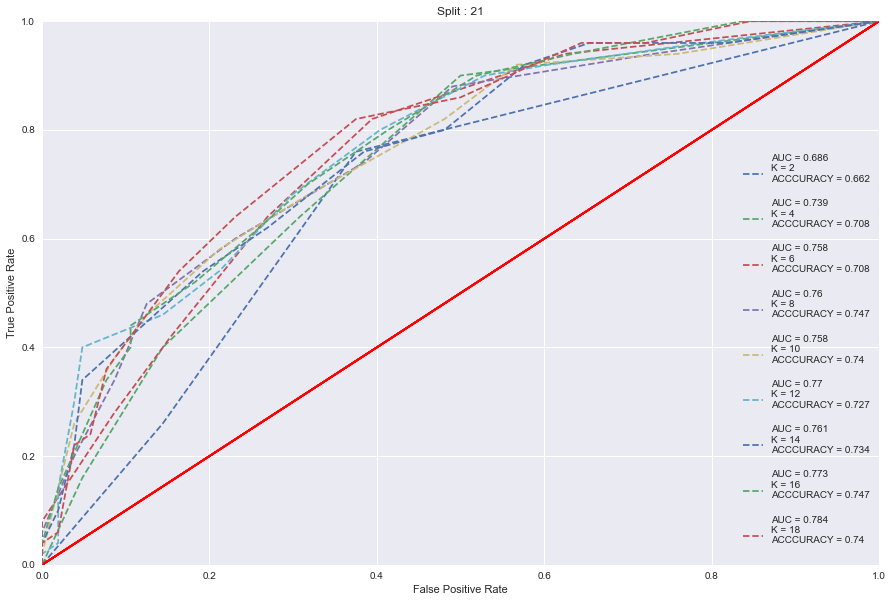

<Figure size 576x396 with 0 Axes>

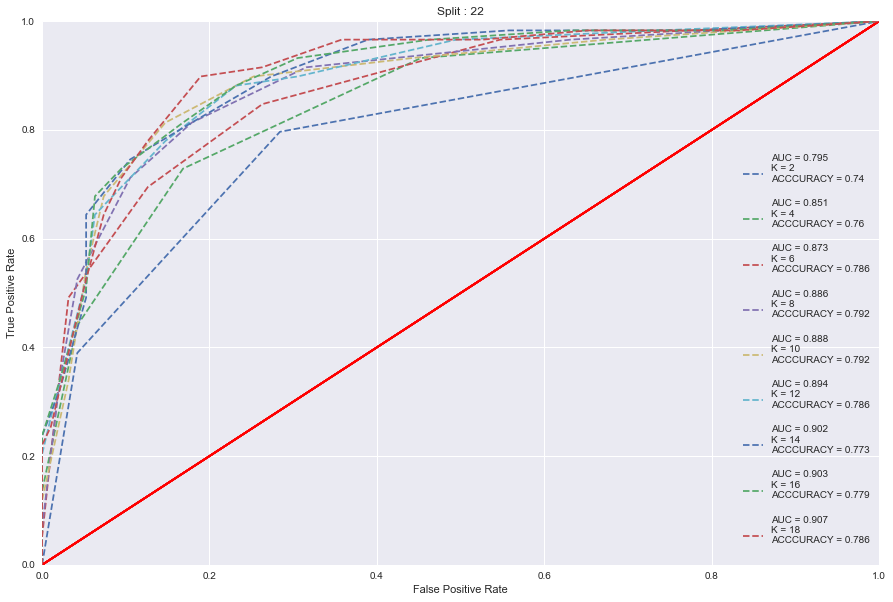

<Figure size 576x396 with 0 Axes>

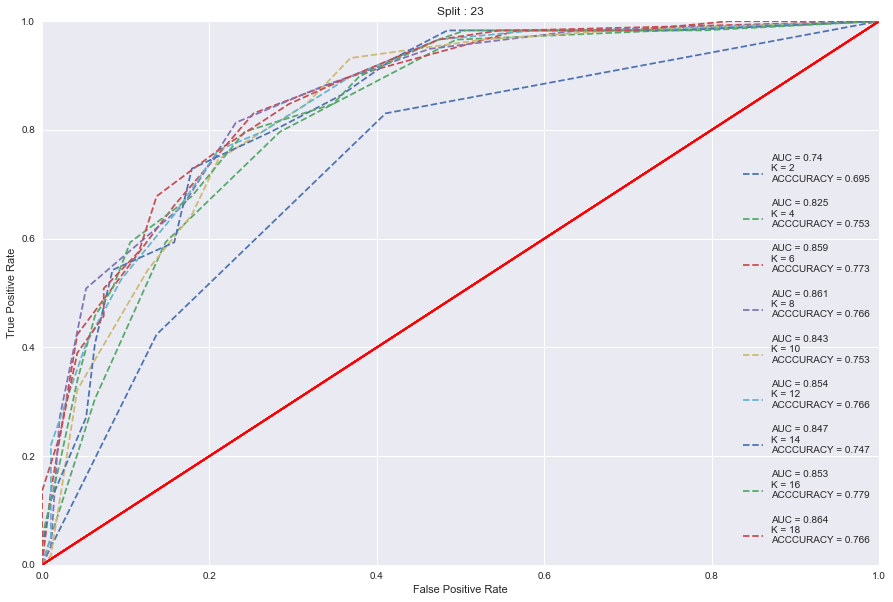

<Figure size 576x396 with 0 Axes>

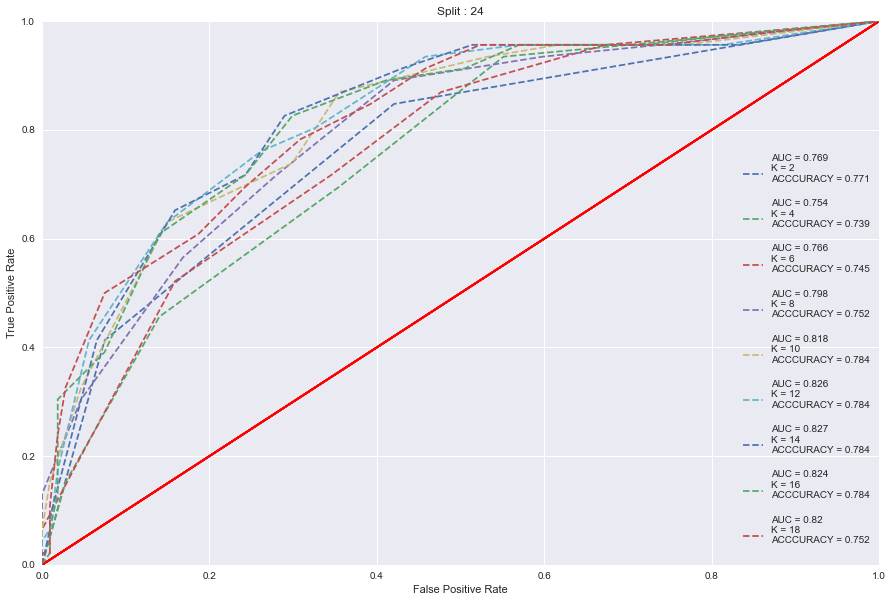

<Figure size 576x396 with 0 Axes>

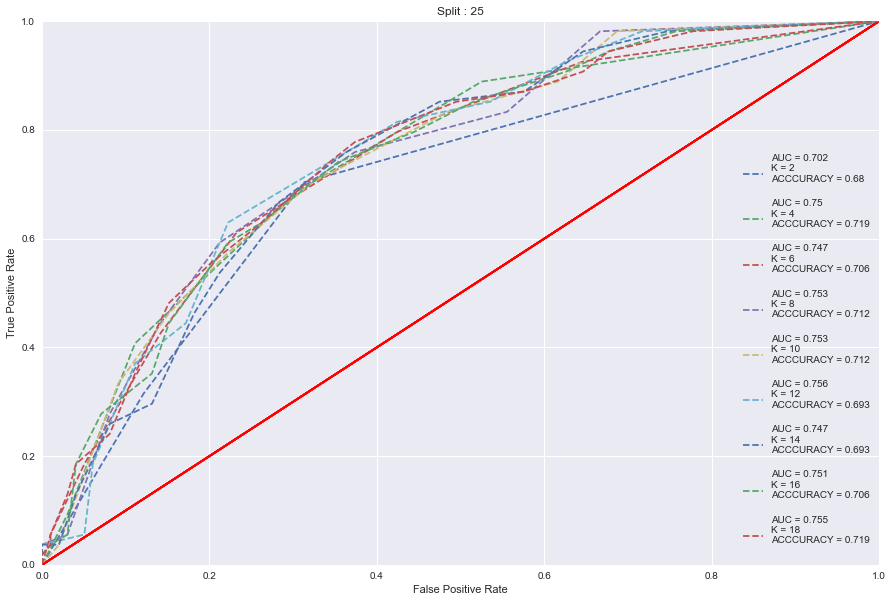

<Figure size 576x396 with 0 Axes>

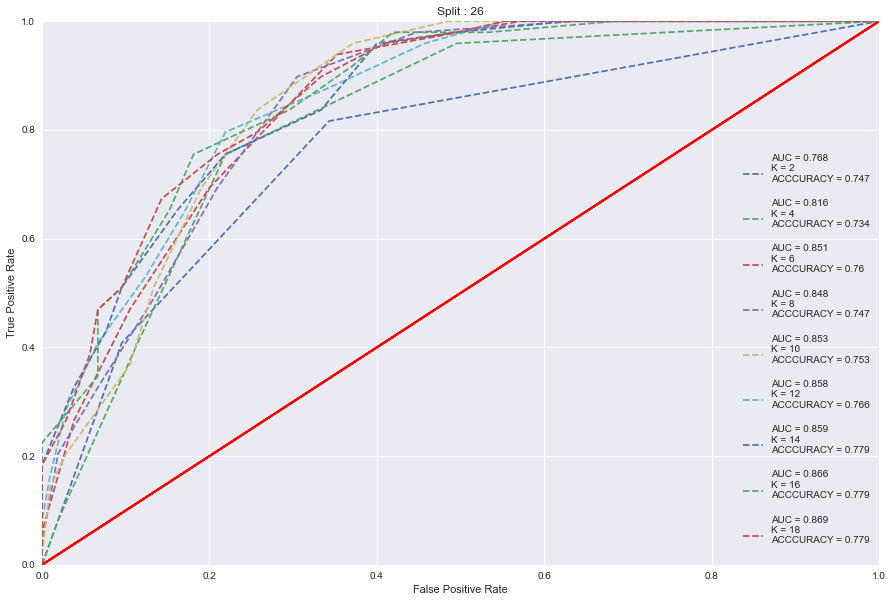

<Figure size 576x396 with 0 Axes>

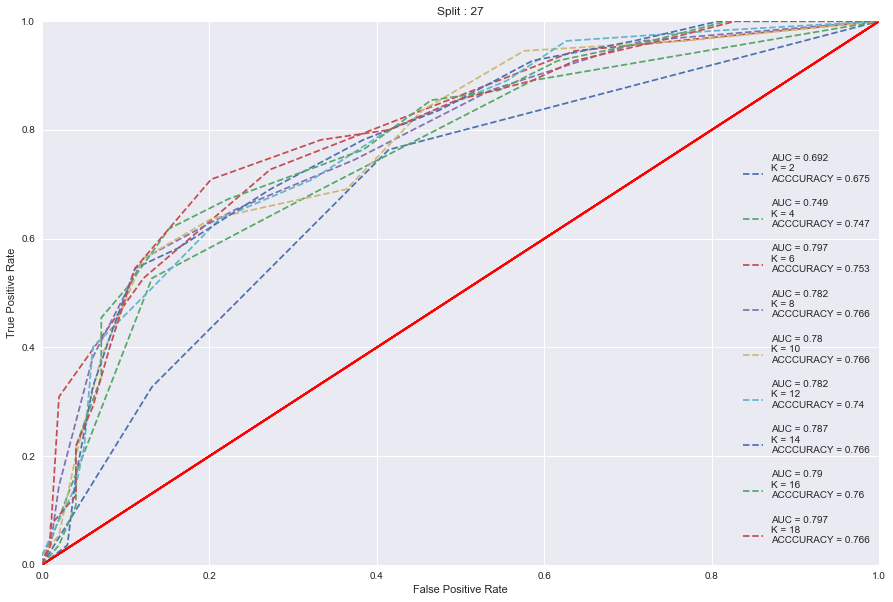

<Figure size 576x396 with 0 Axes>

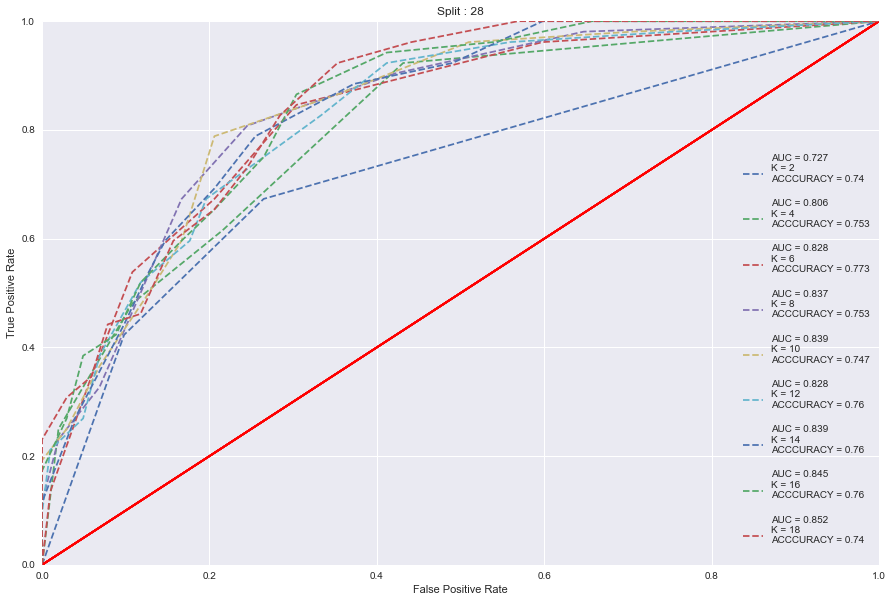

<Figure size 576x396 with 0 Axes>

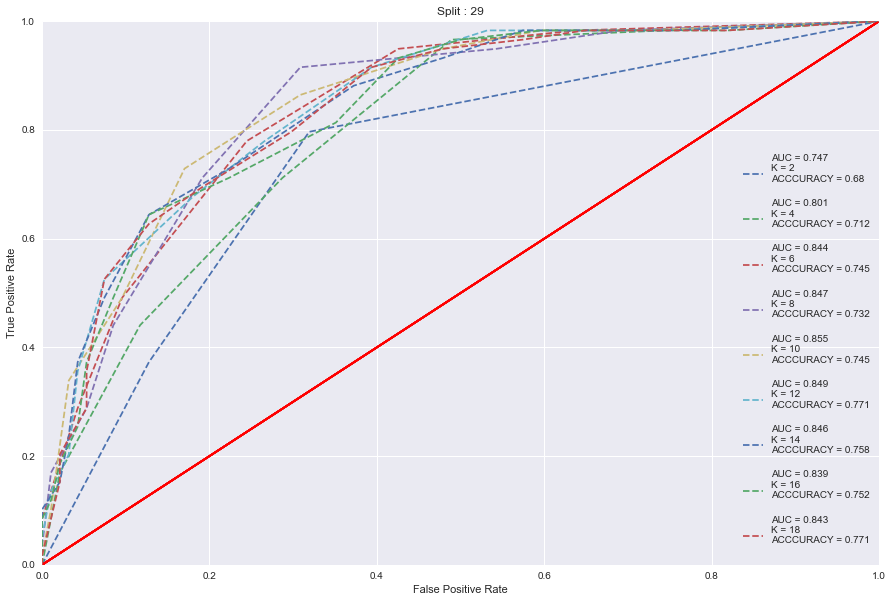

<Figure size 576x396 with 0 Axes>

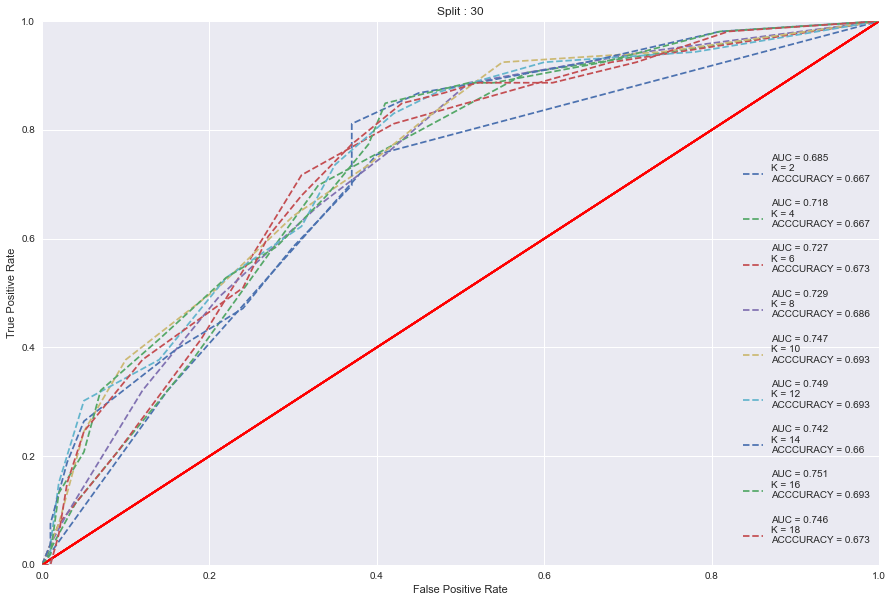

<Figure size 576x396 with 0 Axes>

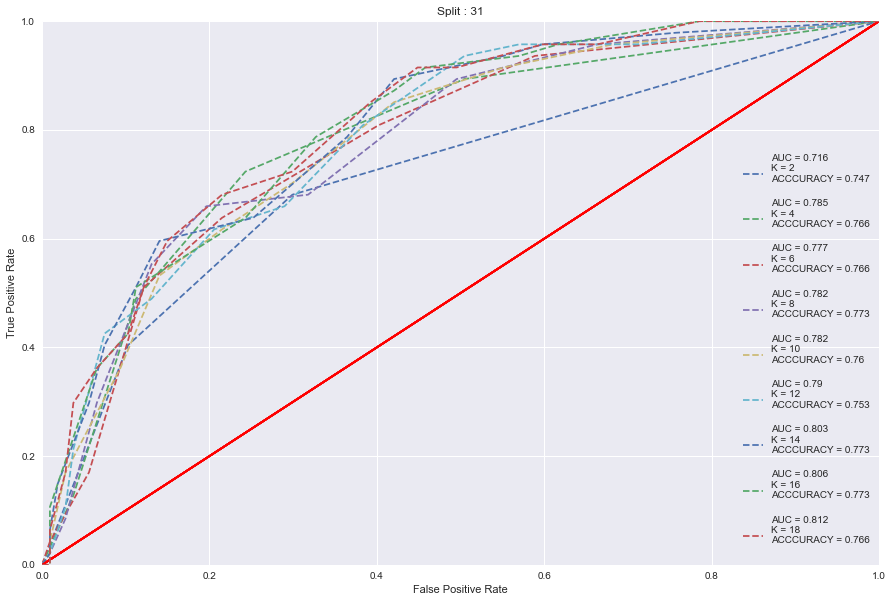

<Figure size 576x396 with 0 Axes>

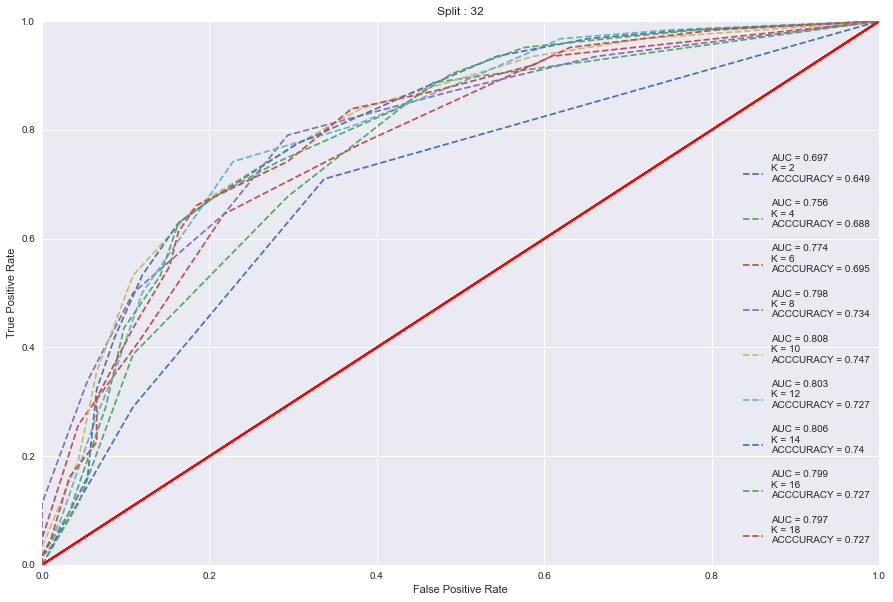

<Figure size 576x396 with 0 Axes>

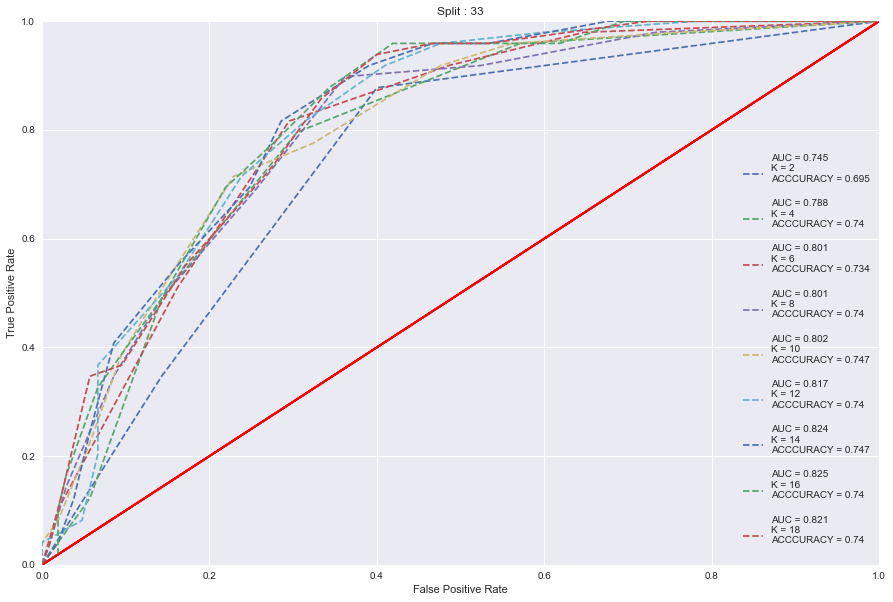

<Figure size 576x396 with 0 Axes>

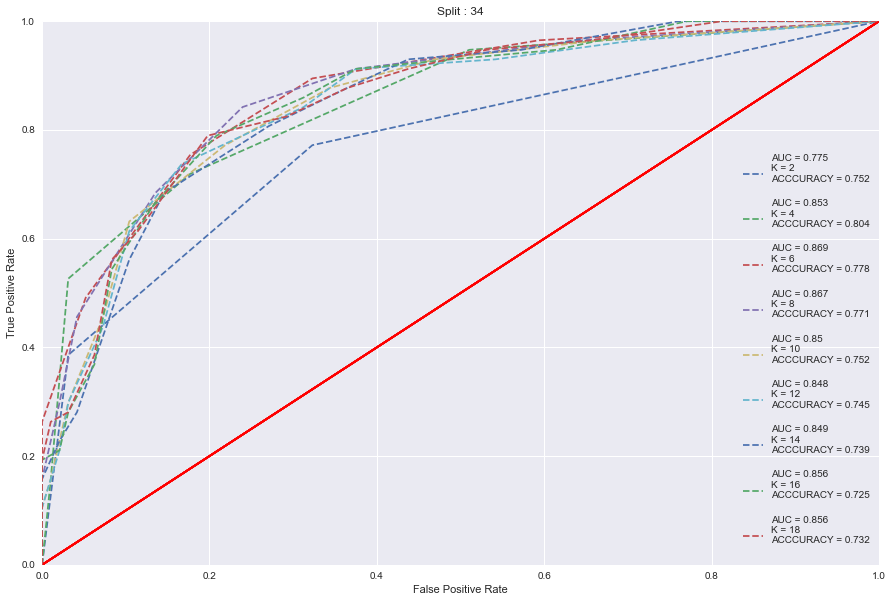

<Figure size 576x396 with 0 Axes>

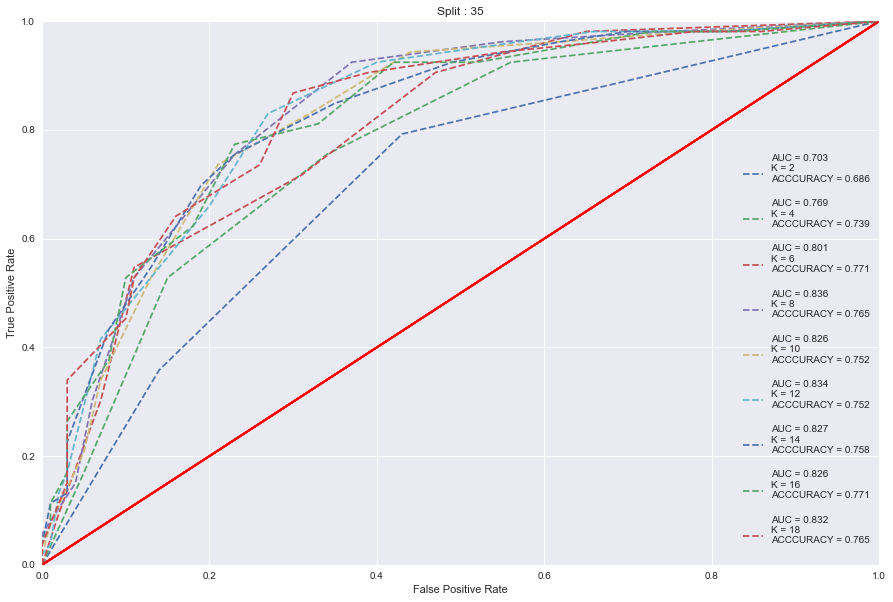

<Figure size 576x396 with 0 Axes>

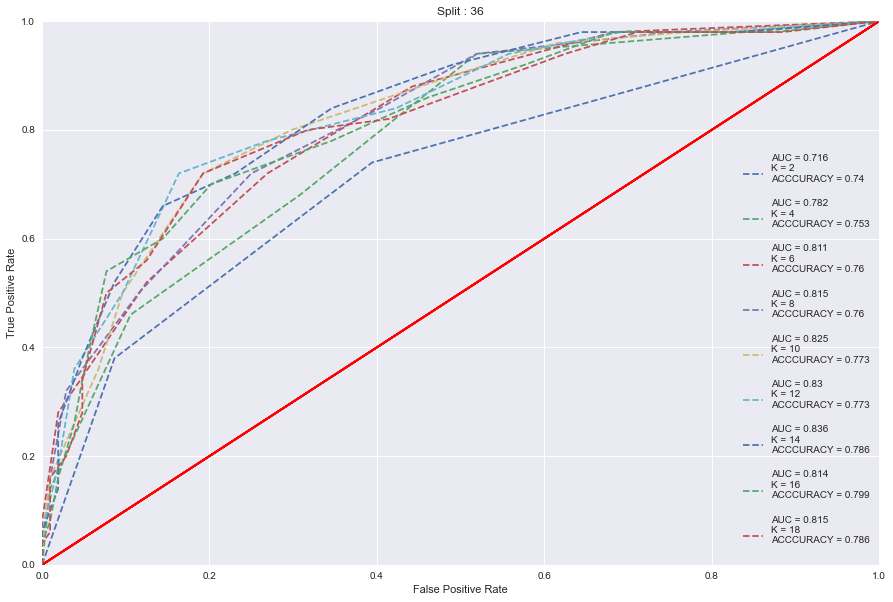

<Figure size 576x396 with 0 Axes>

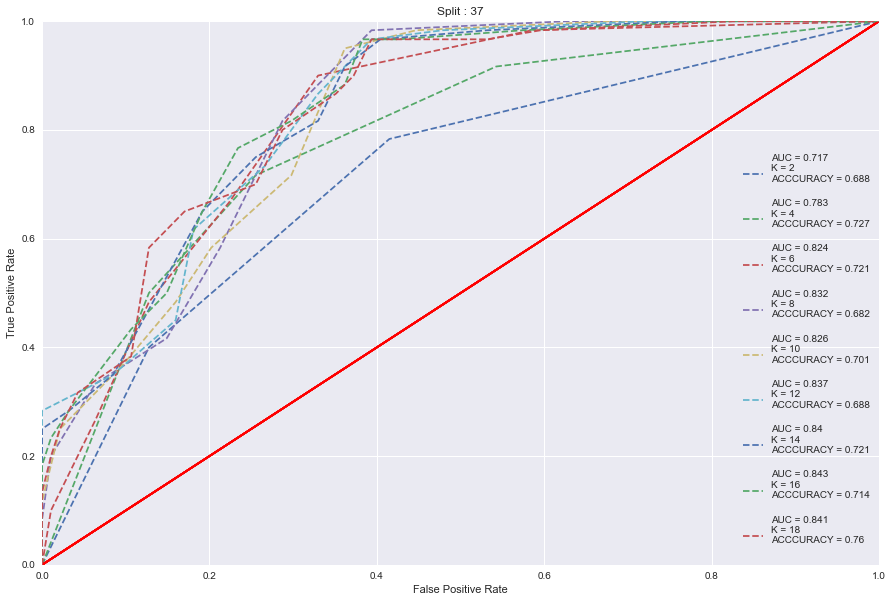

<Figure size 576x396 with 0 Axes>

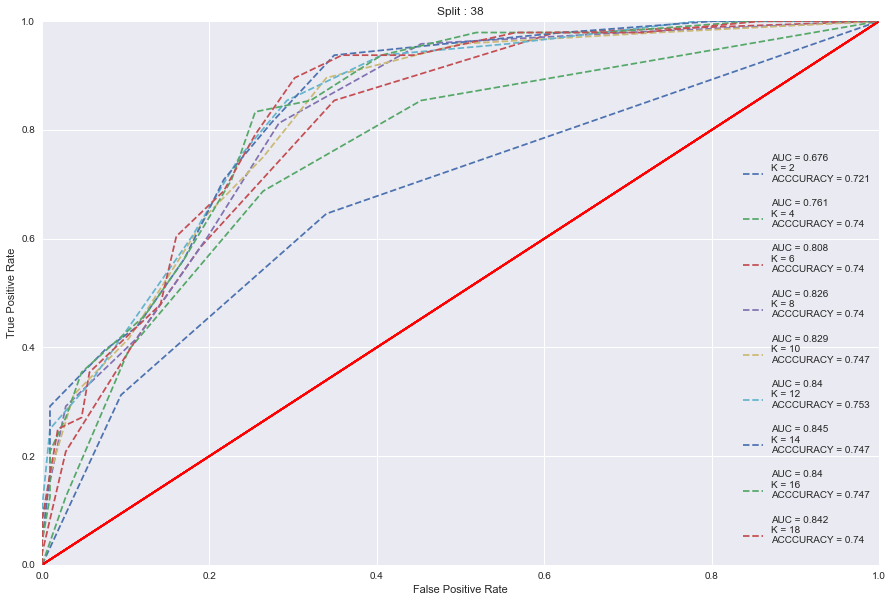

<Figure size 576x396 with 0 Axes>

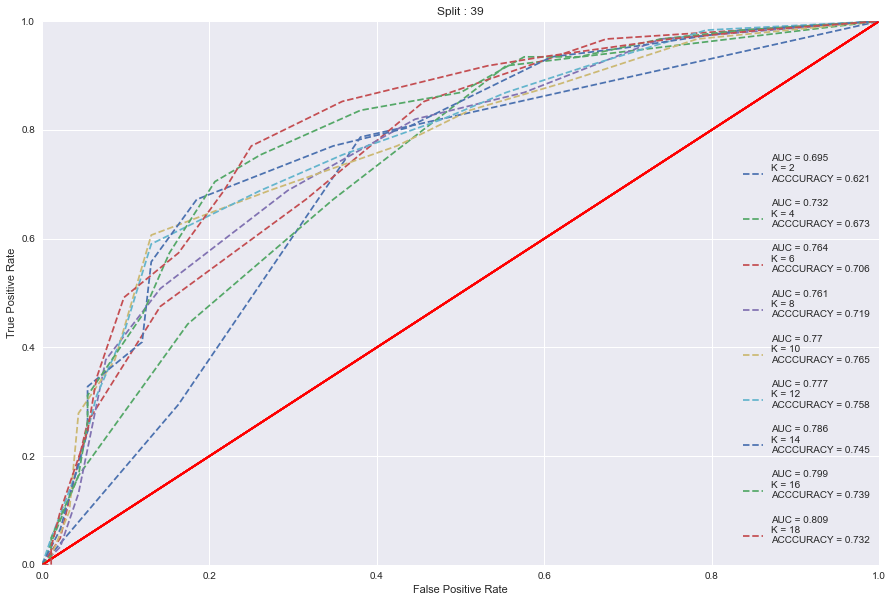

<Figure size 576x396 with 0 Axes>

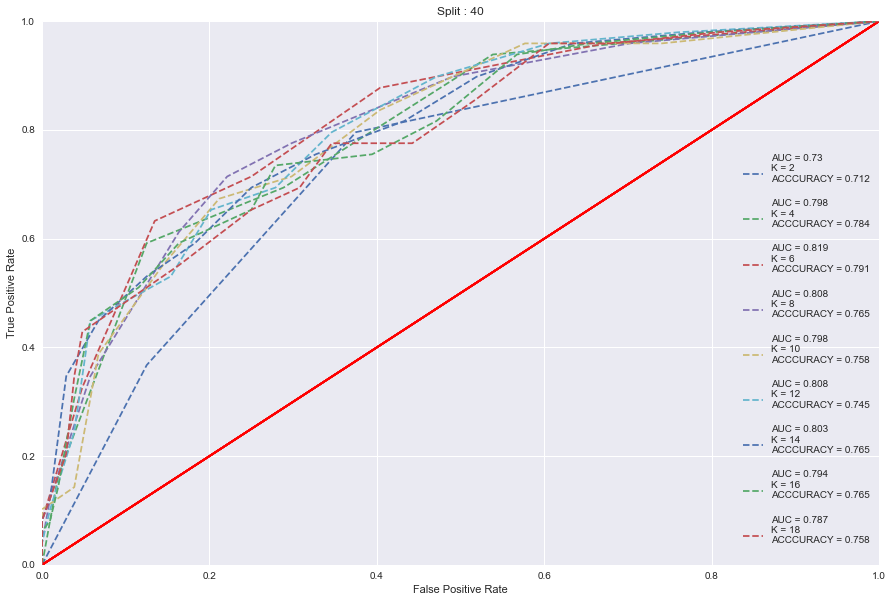

<Figure size 576x396 with 0 Axes>

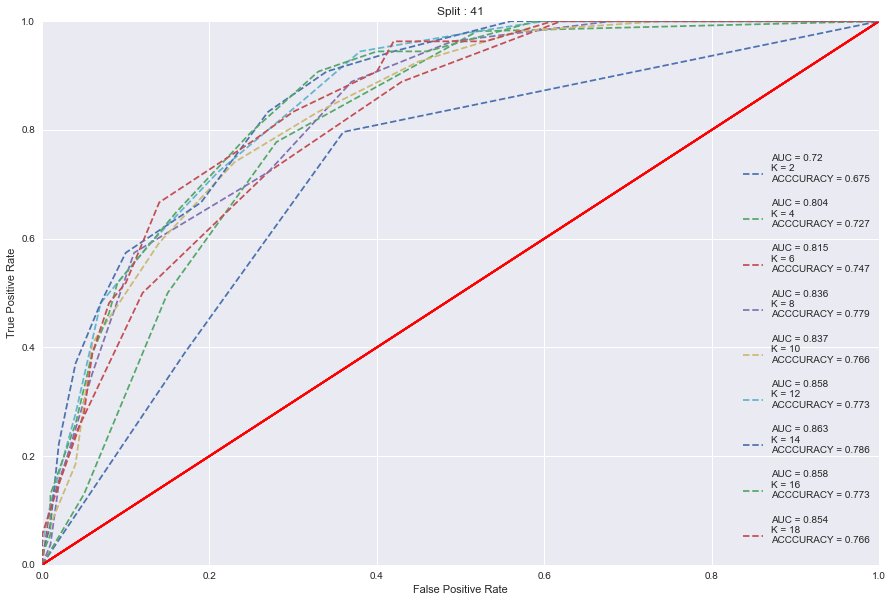

<Figure size 576x396 with 0 Axes>

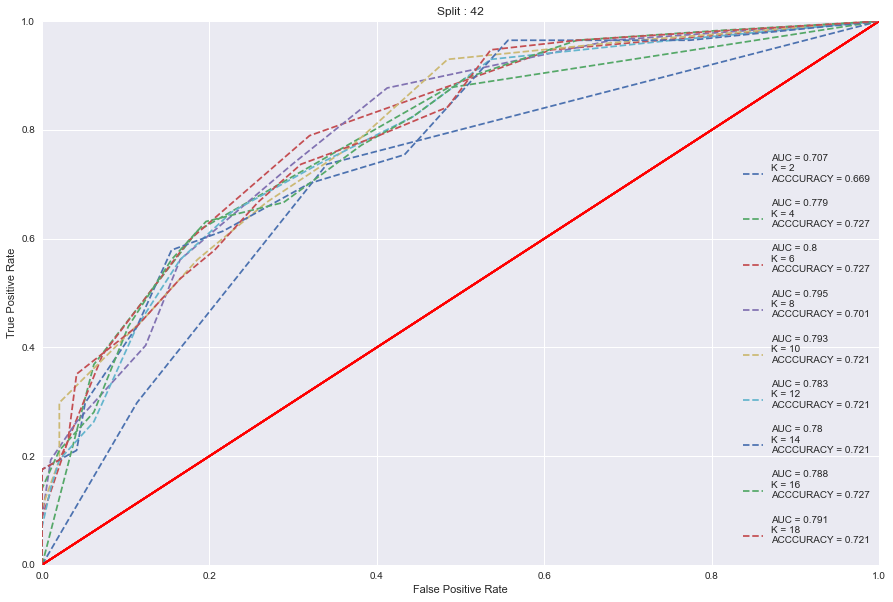

<Figure size 576x396 with 0 Axes>

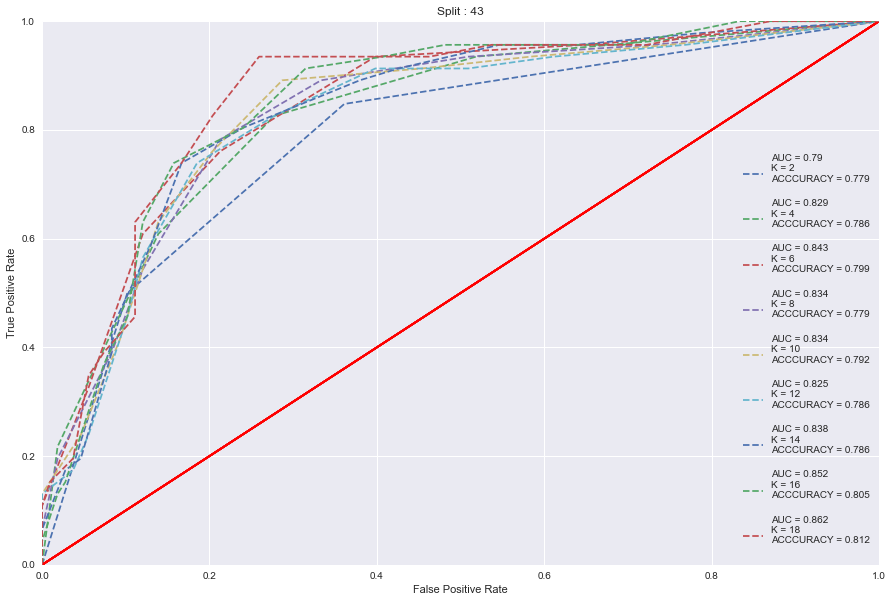

<Figure size 576x396 with 0 Axes>

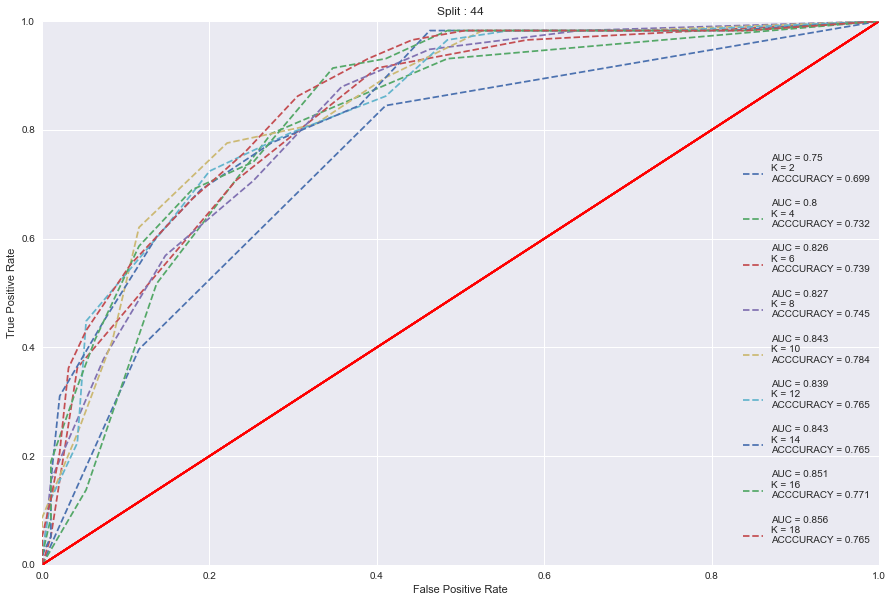

<Figure size 576x396 with 0 Axes>

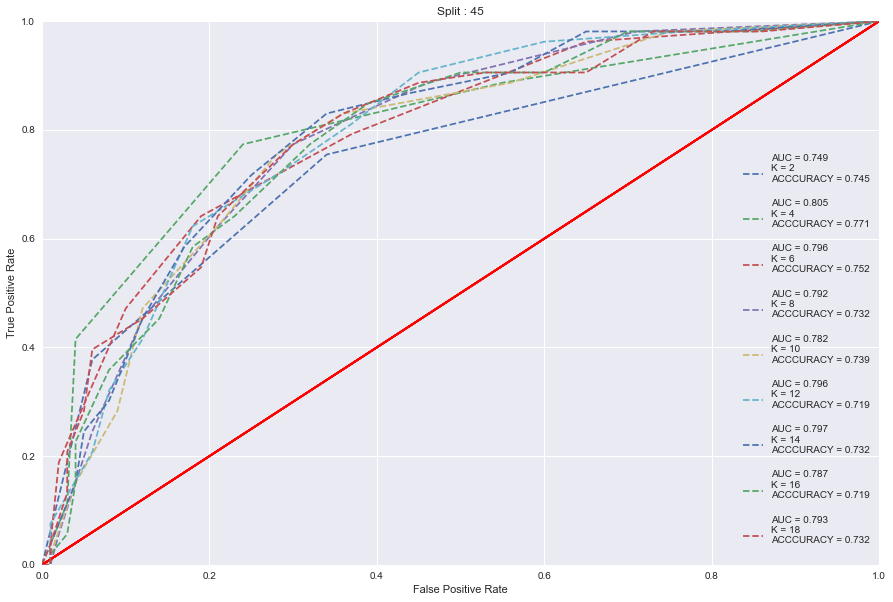

<Figure size 576x396 with 0 Axes>

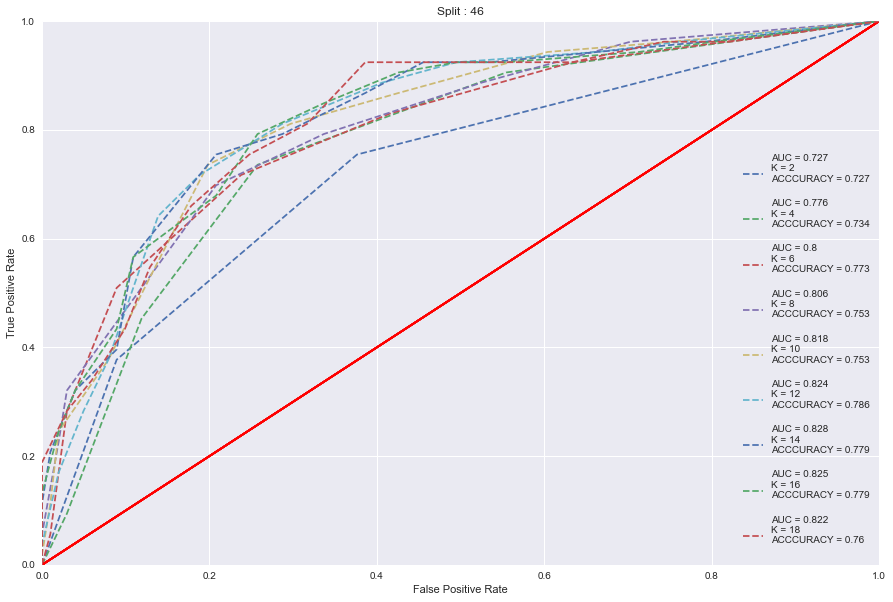

<Figure size 576x396 with 0 Axes>

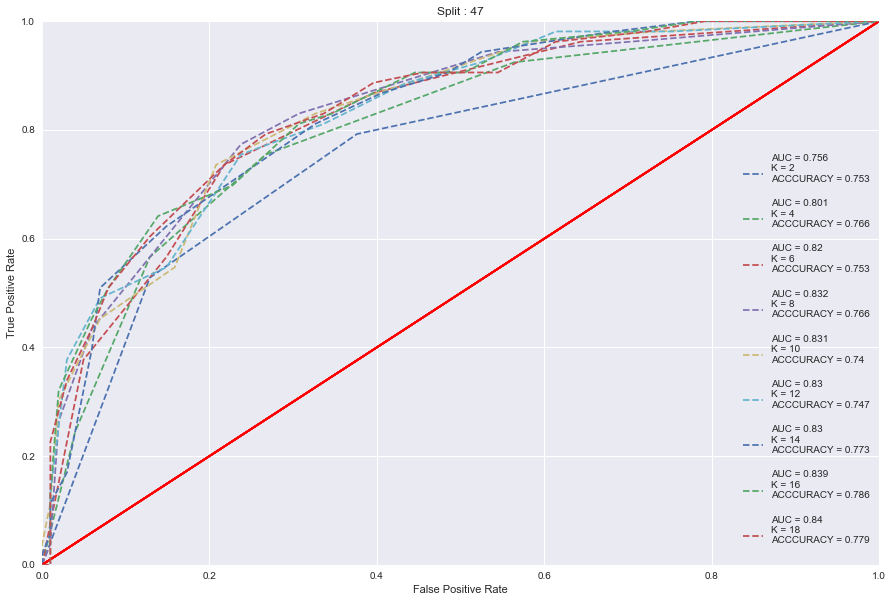

<Figure size 576x396 with 0 Axes>

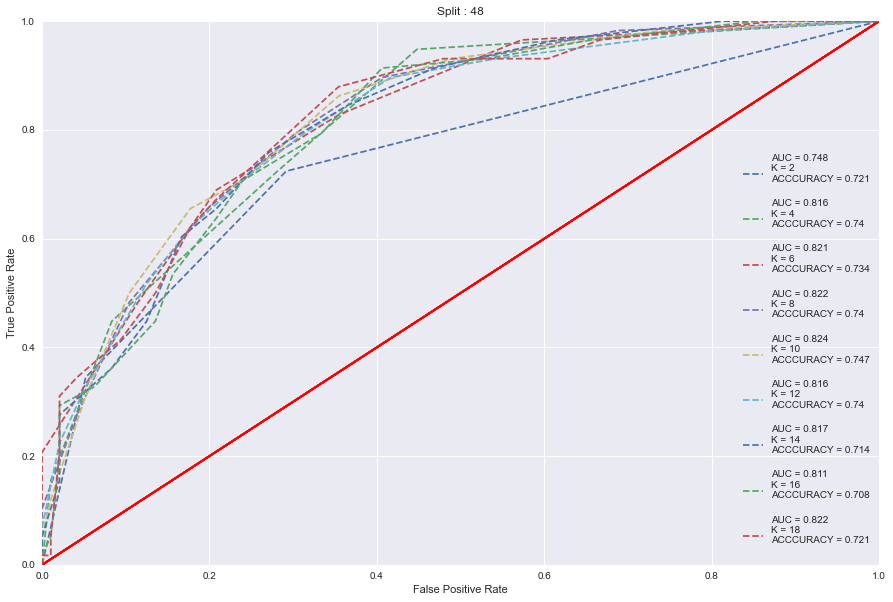

<Figure size 576x396 with 0 Axes>

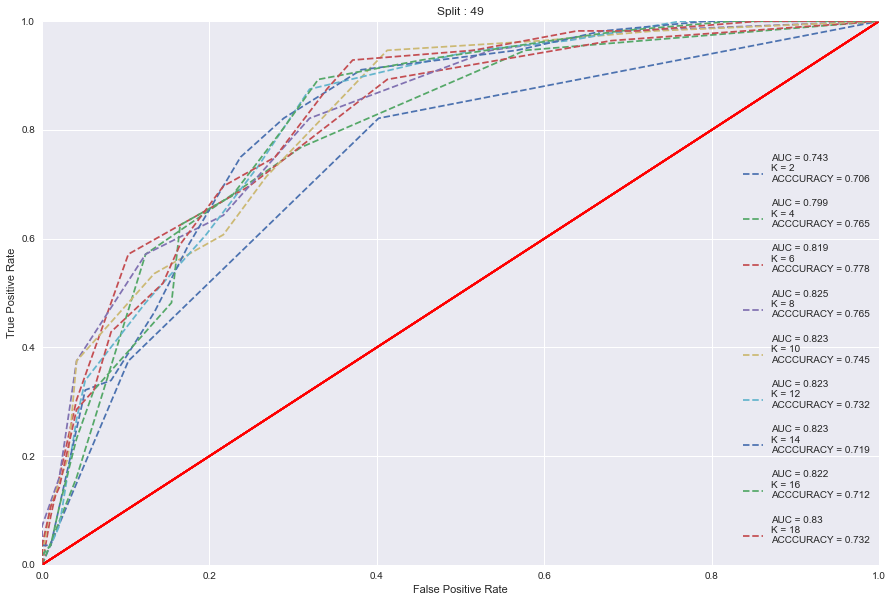

<Figure size 576x396 with 0 Axes>

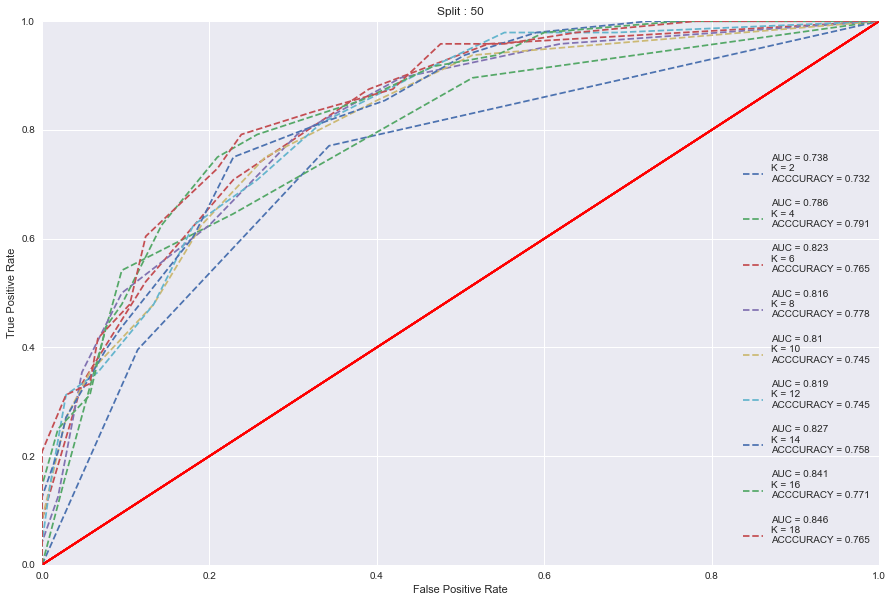

In [34]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

j = 1

for train_index, test_index in kf.split(X):

    #print("Train:", train_index, "\nValidation:",test_index) 

    X_train, X_test = X[train_index], X[test_index] 
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Training the Model
    model = KNeighborsClassifier( n_neighbors = 5 )
    model.fit( X_train, Y_train.ravel() )

    plt.figure()
    plt.figure(figsize=(15,10))

    for i in range(2,20,2):

      # Training the Model
      model = KNeighborsClassifier( n_neighbors = i )
      model.fit(X_train, Y_train.ravel())

      # The function predict_proba() returns a numpy array of two columns. 
      # The first column is the probability that target=0 and the second column is the probability that target = 1

      Y_pred = model.predict_proba(X_test)

      # Select the probability estimates of the positive class
      fpr, tpr, threshold = roc_curve(Y_test, Y_pred[:, 1])

      roc_auc = roc_auc_score(Y_test, Y_pred[:, 1])

      # Predicting Test Data Set
      Y_pred = model.predict(X_test)
    
      plt.title('Split : {}'.format(j))
      plt.plot([0, 1], [0, 1],'r-')
      plt.xlim([0, 1]) 
      plt.ylim([0, 1])

      plt.ylabel('True Positive Rate') 
      plt.xlabel('False Positive Rate') 

      plt.plot(fpr, tpr, linestyle='--', label = 'AUC = {}\nK = {}\nACCCURACY = {}\n'.format(roc_auc.round(3),i,accuracy_score(Y_test, Y_pred).round(3)))
      plt.legend()

    plt.show()
    j += 1